# Stock Portfolio Optimisation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import warnings

warnings.filterwarnings("ignore")
stock_data = pd.read_csv("adjprice.csv")

In [4]:
stock_data

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,19930907,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,19930908,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,19930909,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,19930910,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,19930911,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,20190727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,20190728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,20190729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,20190730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


# Checking for Missing Values and Filling Them

In [6]:
# Convert Date column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y%m%d')

# 1. Checking missing values
missing_values = stock_data.isna().sum().sum()
print(f"Total Missing Values: {missing_values}")

stock_data.fillna(method = "ffill", inplace = True)
stock_data.fillna(method = "bfill", inplace = True)

# Check missing values after filling
missing_values_after = stock_data.isna().sum().sum()
print(f"Total Missing Values After Filling: {missing_values_after}")

Total Missing Values: 3920447
Total Missing Values After Filling: 0


In [7]:
stock_data.head()

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,24.9203,144439.5121,4.0346,25.3928,28.0091,6.875,7.1675,30.7970,24.8866,29.98
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,24.9203,143691.1208,4.0346,25.3928,28.0091,6.750,6.9766,30.0188,24.8866,29.98
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,24.9203,143691.1208,4.0346,25.3928,28.0091,6.625,6.9554,30.0188,24.8866,29.98
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,24.9203,145187.9033,4.0346,25.3928,28.0091,6.750,7.2099,29.6852,24.8866,29.98
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,24.9203,145187.9033,4.0346,25.3928,28.0091,6.750,7.2099,29.6852,24.8866,29.98


# Summary Statistics

In [9]:
# 2. Summary statistics
summary_stats = stock_data.describe().T
print(summary_stats.head())

                     count                 mean                  min  \
Date                  9459  2006-08-19 00:00:00  1993-09-07 00:00:00   
0111145D US Equity  9459.0            34.517894              10.1299   
0202445Q US Equity  9459.0              67.5154              13.1317   
0203524D US Equity  9459.0            17.662079                3.651   
0226226D US Equity  9459.0             19.08675                4.201   

                                    25%                  50%  \
Date                2000-02-27 12:00:00  2006-08-19 00:00:00   
0111145D US Equity              21.2135              31.1573   
0202445Q US Equity             35.69855              63.5314   
0203524D US Equity              11.4939              18.0679   
0226226D US Equity                11.95                11.95   

                                    75%                  max        std  
Date                2013-02-07 12:00:00  2019-07-31 00:00:00        NaN  
0111145D US Equity              54

# Average Stock price for each company (anually)

In [11]:
#calculate average stock price for each company annually (26 years)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')
yearly_avg = stock_data.groupby(stock_data.index.year).mean()
yearly_avg.index.name = 'Year'  #Rename index "Date" to "Year" 

# Display the result
yearly_avg

,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,0772031D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
Year,,,,,,,,,,,,,,,,,,,,,
1993,12.630372,14.232747,7.918696,8.426668,10.229526,56.872964,16.184505,7.209174,26.616612,4.348300,...,24.920300,143881.653562,4.034600,25.392800,28.009100,7.081897,6.818473,25.804794,24.886600,29.980000
1994,11.676695,20.149318,8.480758,5.899327,9.375685,70.788659,15.691691,7.059332,23.419443,4.348300,...,24.920300,133566.383317,4.034600,25.392800,28.009100,10.263699,6.686587,19.606442,24.886600,29.980000
1995,12.198784,26.912217,10.797010,5.900133,12.665068,92.839909,18.635049,7.287393,22.368739,4.348300,...,24.920300,107292.926265,4.034600,25.392800,28.009100,8.422945,9.342819,20.308168,24.886600,29.980000
1996,15.089960,33.542028,8.132369,6.605906,12.916624,169.080472,22.376771,9.385709,27.835604,4.348300,...,24.920300,84115.570143,4.034600,25.392800,28.009100,10.975751,14.841573,21.610111,24.886600,29.980000
1997,18.774035,35.788293,14.038288,10.098570,9.136945,173.500000,23.853972,12.376596,36.707261,6.818558,...,24.920300,149081.425065,4.139668,25.392800,28.009100,10.259075,25.975105,28.507574,24.886600,29.980000
1998,21.891836,24.684971,7.515258,15.723608,7.694054,173.500000,20.582953,12.463515,54.930183,14.507575,...,27.814808,119491.678778,4.869896,25.392800,28.009100,2.410570,36.871250,42.830718,24.886600,29.980000
1999,20.955611,29.063761,10.964167,14.207132,5.685025,173.500000,18.722212,12.731147,59.312500,27.547996,...,43.380682,110959.885443,6.989756,25.392800,28.009100,0.250705,46.391107,44.312500,24.886600,29.980000
2000,20.539750,49.872639,21.449986,11.633405,6.371762,173.500000,24.176746,15.035943,59.312500,36.587947,...,51.359973,109487.860918,4.222919,25.392800,28.009100,0.009484,37.795514,44.312500,24.886600,29.980000
2001,23.573178,50.010492,12.639737,17.988079,11.057460,173.500000,26.183933,17.850547,59.312500,22.338699,...,48.062500,138364.102114,5.892753,25.392800,27.723159,0.001000,42.754872,44.312500,24.886600,29.980000


# Top 10 Stocks in terms of average price over the 26 years

In [13]:
# Calculate the mean stock price for each company over all years
company_avgs = yearly_avg.mean()

# Sort and get the top 10 best-performing companies
top_10 = company_avgs.sort_values(ascending=False).head(10)

print(top_10)

YRCW US Equity     105670.636907
GOOG US Equity        621.000299
BVSN US Equity        575.420392
BKNG US Equity        490.438655
AIG US Equity         441.902178
2223Q US Equity       338.027262
GHC US Equity         320.982439
GOOGL US Equity       298.582984
AMZN US Equity        270.722730
TFX US Equity         268.947561
dtype: float64


# Top 10 Stocks in terms of growth (increase/improved) over 26 years

In [15]:
first_year = yearly_avg.iloc[0]
last_year = yearly_avg.iloc[-1]

returns = (last_year[1:] - first_year[1:]) / first_year[1:]  # Exclude 'Year' column
top_10_growth = returns.sort_values(ascending=False).head(10)

print(top_10_growth)

AMZN US Equity        1194.233962
MNST US Equity        1061.917524
1288453D US Equity     761.607663
NFLX US Equity         328.663822
CTSH US Equity         327.123692
COO US Equity          322.080467
BIIB US Equity         307.243817
CELG US Equity         261.277181
ROST US Equity         250.476520
AAPL US Equity         210.202332
dtype: float64


# Cumulative Returns to Display Growth 

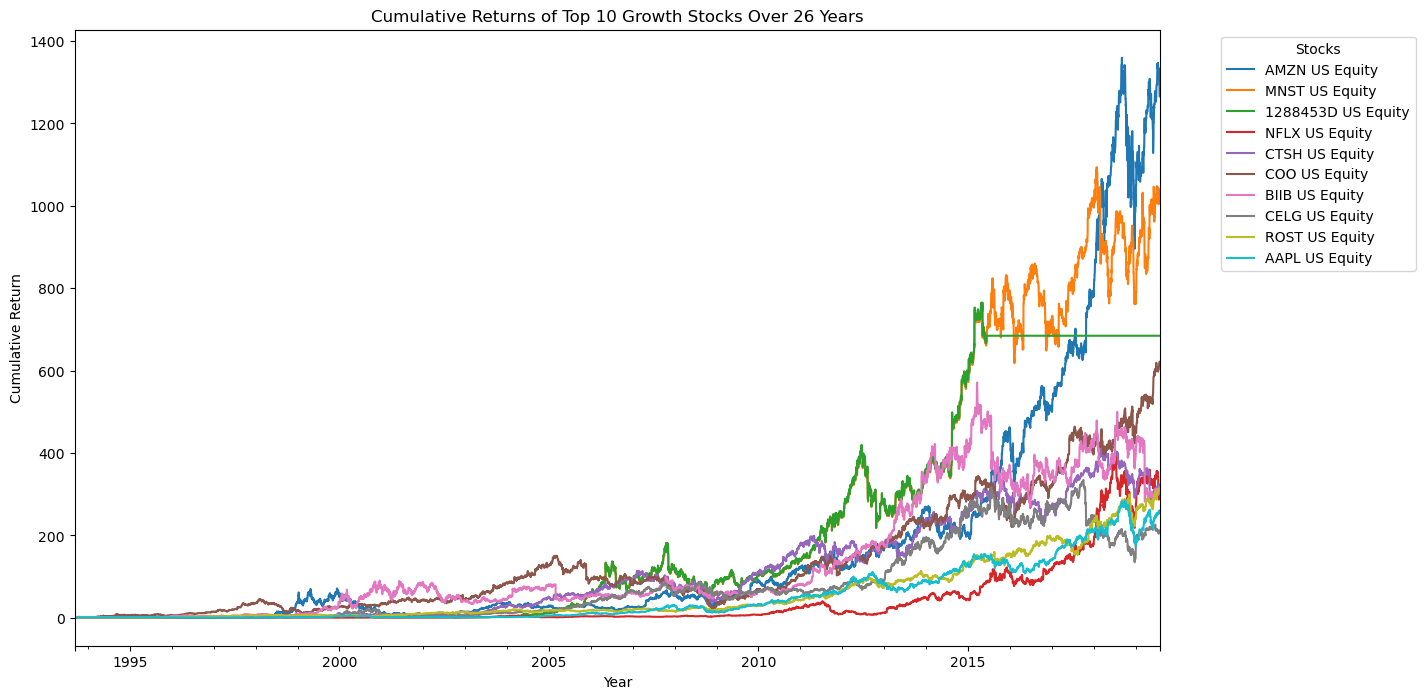

In [17]:
# Calculate cumulative returns for each stock
top_10_growth_stocks = top_10_growth.index.tolist()

cumulative_returns = (1 + stock_data[top_10_growth_stocks].pct_change()).cumprod()

# Plot the cumulative returns over time
# Displays how the value of a stock grows over the 26 years
cumulative_returns.plot(figsize=(14, 8))
plt.title('Cumulative Returns of Top 10 Growth Stocks Over 26 Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Time Series Analysis for the Top 10 Stocks in terms of Growth

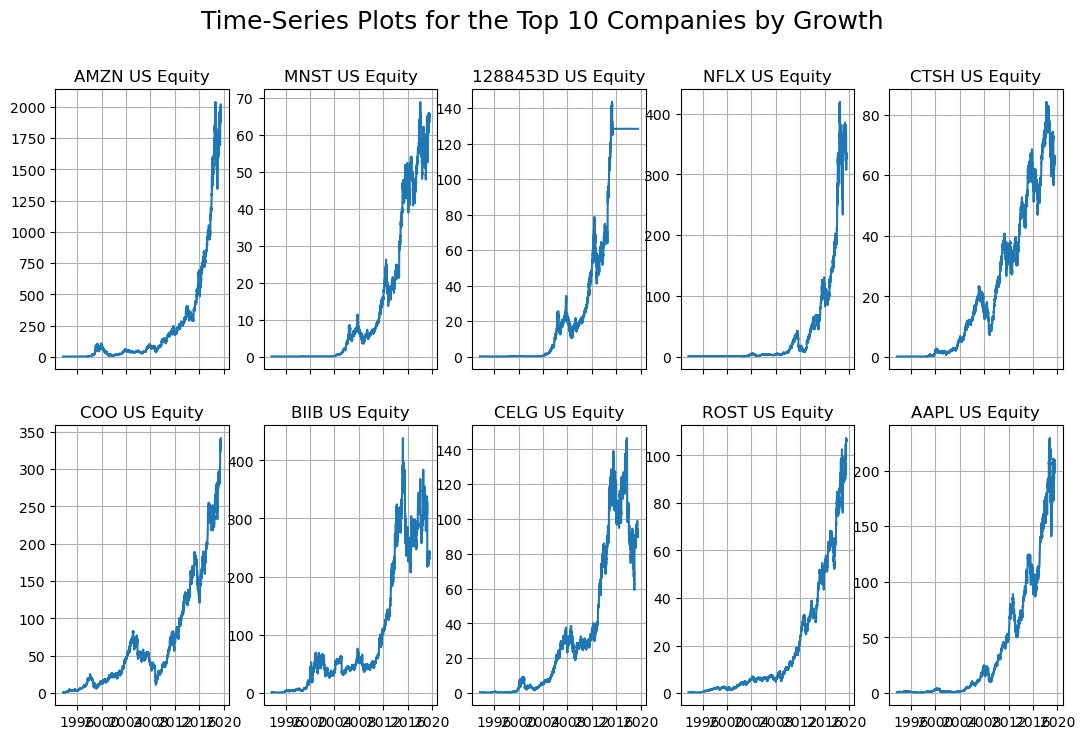

In [19]:
stock_data_cleaned = stock_data.dropna(axis=1, how='all')

top_10_companies = top_10_growth.index.tolist()  # Top 10 based on average price
stock_data_top10 = stock_data_cleaned[top_10_companies]

# Plot all 10 in one grid
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(13, 8), sharex=True)
fig.suptitle('Time-Series Plots for the Top 10 Companies by Growth', fontsize=18)
axes = axes.flatten()

for i, col in enumerate(top_10_companies):
    ax = axes[i]
    ax.plot(stock_data_cleaned.index, stock_data_cleaned[col])
    ax.set_title(col)
    ax.grid(True)
    
plt.show()

# Stock Volatility 

Most volatile (Top 10): AMZN US Equity (Std Dev of Returns: 1.1964)
Least volatile (Top 10): ROST US Equity (Std Dev of Returns: 0.3492)


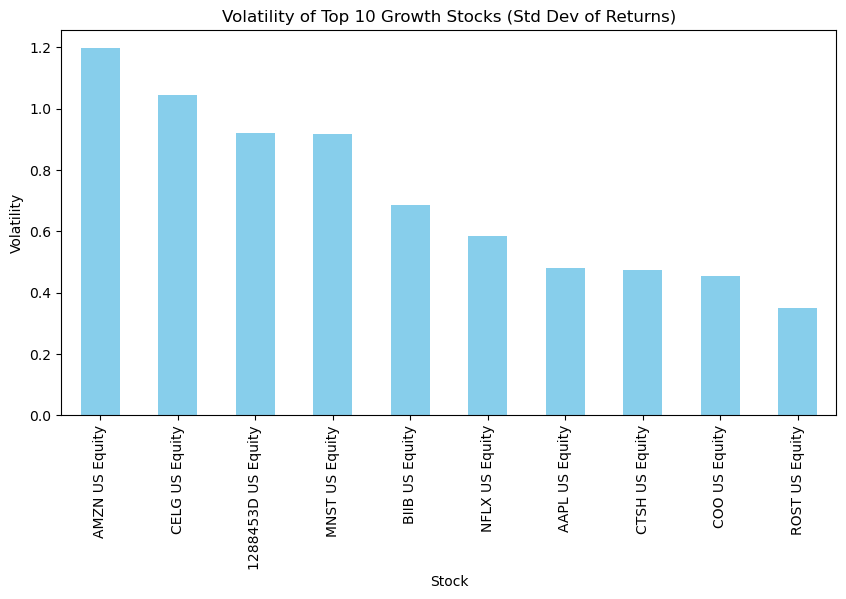

In [21]:
# List of top 10 growth stocks
top10_stocks = ['AMZN US Equity', 'MNST US Equity', '1288453D US Equity', 'NFLX US Equity','CTSH US Equity', 
                'COO US Equity', 'BIIB US Equity',  'CELG US Equity', 'ROST US Equity', 'AAPL US Equity']

# Remove Year column
price_only = yearly_avg.drop(columns=yearly_avg.columns[0])

# Filter top 10 stocks
price_top10 = price_only[top10_stocks]

# Calculate returns
returns_top10 = price_top10.pct_change()

# Calculate standard deviation of returns (volatility)
volatility_top10 = returns_top10.std()

# Find the least and most volatile among the top 10
most_volatile = volatility_top10.idxmax()
least_volatile = volatility_top10.idxmin()

most_volatile_value = volatility_top10.max()
least_volatile_value = volatility_top10.min()

# Print results
print(f"Most volatile (Top 10): {most_volatile} (Std Dev of Returns: {most_volatile_value:.4f})")
print(f"Least volatile (Top 10): {least_volatile} (Std Dev of Returns: {least_volatile_value:.4f})")

# Plot the graph 
volatility_top10.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Volatility of Top 10 Growth Stocks (Std Dev of Returns)')
plt.ylabel('Volatility')
plt.xlabel('Stock')
plt.show()

# Machine Learning and Modelling

### Prediction of Top 10 Stock Prices using Linear Regression

AMZN US Equity: MSE = 53025.14, R² = -2.892
MNST US Equity: MSE = 77.39, R² = 0.182
1288453D US Equity: MSE = 437.21, R² = 0.487
NFLX US Equity: MSE = 1793.59, R² = -3.193
CTSH US Equity: MSE = 86.87, R² = 0.692
COO US Equity: MSE = 487.08, R² = 0.772
BIIB US Equity: MSE = 2924.04, R² = 0.685
CELG US Equity: MSE = 279.40, R² = 0.709
ROST US Equity: MSE = 130.91, R² = 0.073
AAPL US Equity: MSE = 697.81, R² = 0.266


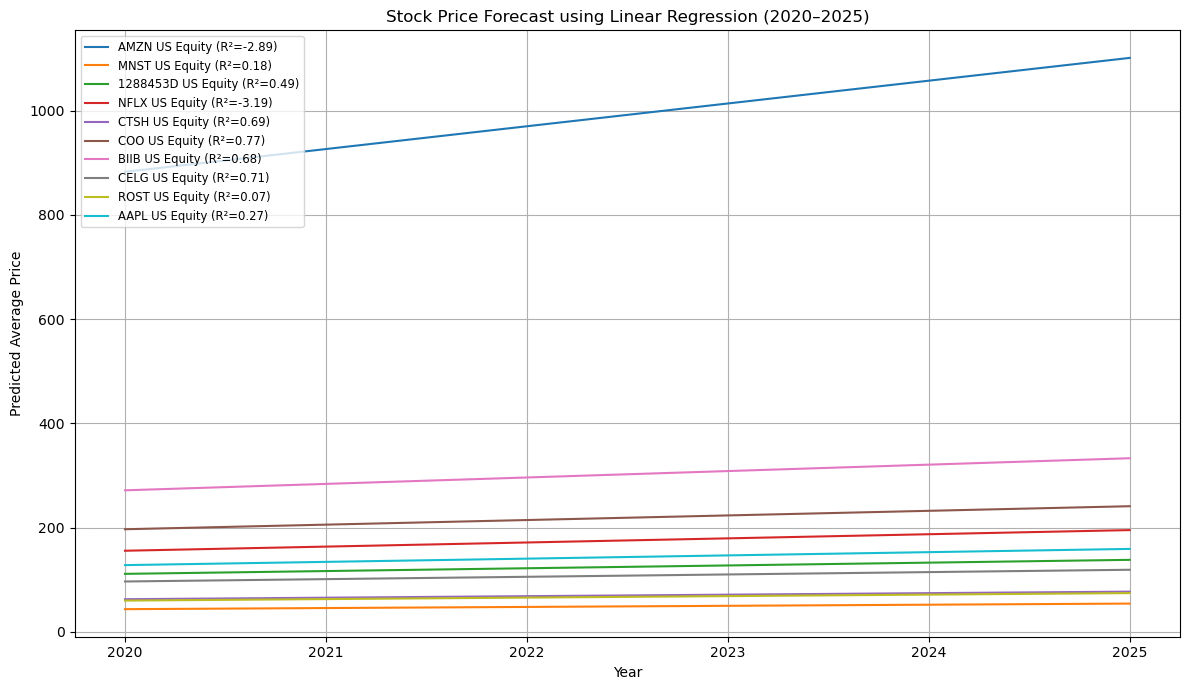

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# list of stocks
top_10_growth = ['AMZN US Equity', 'MNST US Equity', '1288453D US Equity', 'NFLX US Equity', 'CTSH US Equity', 
                 'COO US Equity', 'BIIB US Equity', 'CELG US Equity', 'ROST US Equity', 'AAPL US Equity']

# Future years to predict (until 2026)
future_years = np.array(range(2020, 2026)).reshape(-1, 1)

# Dictionaries to store results
predicted_data = {}
r2_scores_linear = {}
mse_scores = {}

# Loop through each stock
for stock in top_10_growth:
    years = yearly_avg.index.values.reshape(-1, 1)
    stock_price = yearly_avg[stock].values.reshape(-1, 1)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(years, stock_price, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Store metrics
    r2_scores_linear[stock] = r2
    mse_scores[stock] = mse

    # Retrain on all data for future forecasting
    model.fit(years, stock_price)
    predicted_prices = model.predict(future_years).flatten()
    predicted_data[stock] = predicted_prices

    # Print metrics
    print(f"{stock}: MSE = {mse:.2f}, R² = {r2:.3f}")

# Plot all predictions
plt.figure(figsize=(12, 7))
for stock, prices in predicted_data.items():
    label = f"{stock} (R²={r2_scores_linear[stock]:.2f})"
    plt.plot(future_years.flatten(), prices, label=label)

plt.xlabel("Year")
plt.ylabel("Predicted Average Price")
plt.title("Stock Price Forecast using Linear Regression (2020–2025)")
plt.legend(loc="upper left", fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

### Prediction of Top 10 Stock Prices using Ridge Regression


Processing: AMZN US Equity
Ridge - MSE: 49169.68, R²: -2.609

Processing: MNST US Equity
Ridge - MSE: 72.23, R²: 0.237

Processing: 1288453D US Equity
Ridge - MSE: 416.74, R²: 0.511

Processing: NFLX US Equity
Ridge - MSE: 1651.06, R²: -2.859

Processing: CTSH US Equity
Ridge - MSE: 83.38, R²: 0.705

Processing: COO US Equity
Ridge - MSE: 416.00, R²: 0.805

Processing: BIIB US Equity
Ridge - MSE: 2899.48, R²: 0.687

Processing: CELG US Equity
Ridge - MSE: 278.59, R²: 0.709

Processing: ROST US Equity
Ridge - MSE: 119.80, R²: 0.152

Processing: AAPL US Equity
Ridge - MSE: 661.34, R²: 0.304


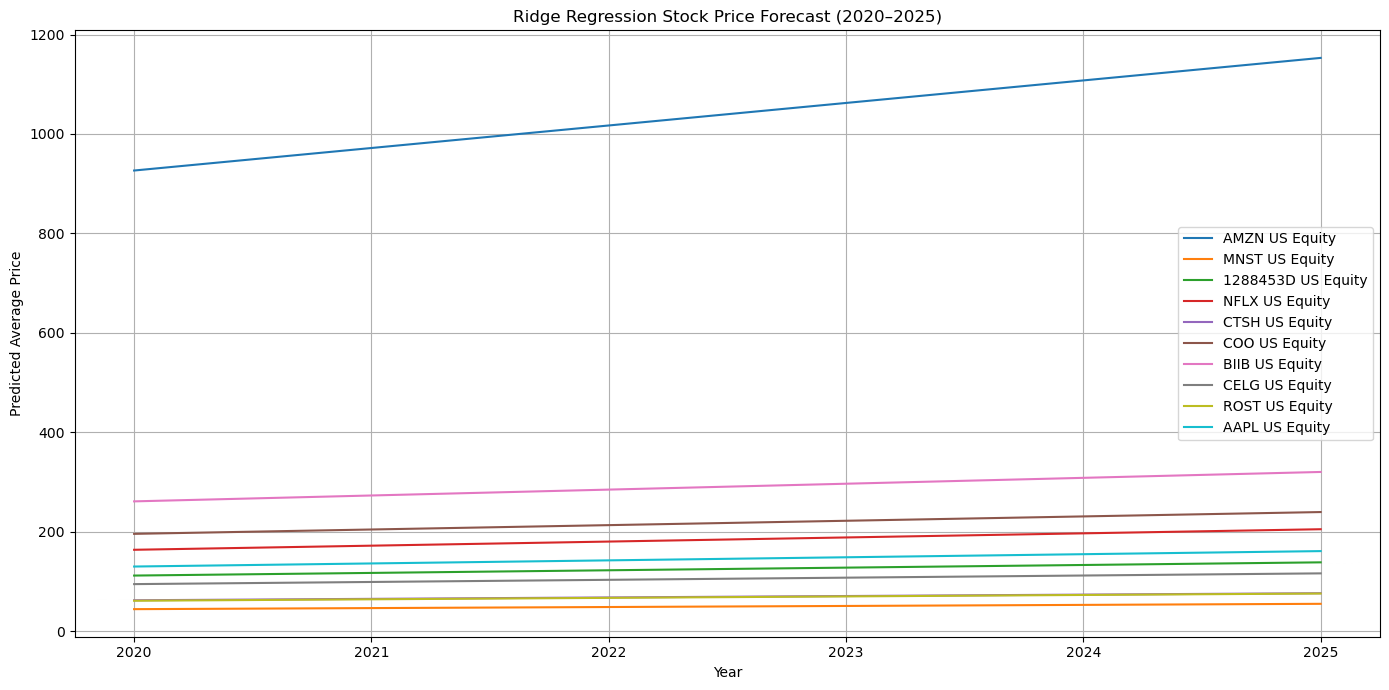

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Dictionary to store predictions and R^2 scores
ridge_predictions = {}
r2_scores_ridge = {} 

# Define future years
future_years = np.arange(2020, 2026).reshape(-1, 1)

# Loop through each stock
for stock in top_10_companies:
    print(f"\nProcessing: {stock}")
    
    try:
        data = yearly_avg[[stock]].dropna()
        if len(data) < 5:
            print(f"Skipping {stock}: Not enough data.")
            continue

        # Feature (Year)
        X = data.index.values.reshape(-1, 1)
        y = data[stock].values

        # Split Training and Testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        future_scaled = scaler.transform(future_years)

        # Train Ridge model
        ridge = Ridge(alpha=1.0)
        ridge.fit(X_train_scaled, y_train)

        # Predict future
        future_pred = ridge.predict(future_scaled)

        # Store predictions
        ridge_predictions[stock] = (future_years.flatten(), future_pred)

        # Predict on test set & store metrics
        test_pred = ridge.predict(X_test_scaled)
        mse = mean_squared_error(y_test, test_pred)
        r2 = r2_score(y_test, test_pred)

        # Store R^2 values
        r2_scores_ridge[stock] = r2

        print(f"Ridge - MSE: {mse:.2f}, R²: {r2:.3f}")
    
    except Exception as e:
        print(f"Error processing {stock}: {e}")

# Plot predictions
plt.figure(figsize=(14, 7))
for stock, (years, preds) in ridge_predictions.items():
    plt.plot(years, preds, label=stock)

plt.title("Ridge Regression Stock Price Forecast (2020–2025)")
plt.xlabel("Year")
plt.ylabel("Predicted Average Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Prediction of Top 10 Stock Prices using Lasso Regression

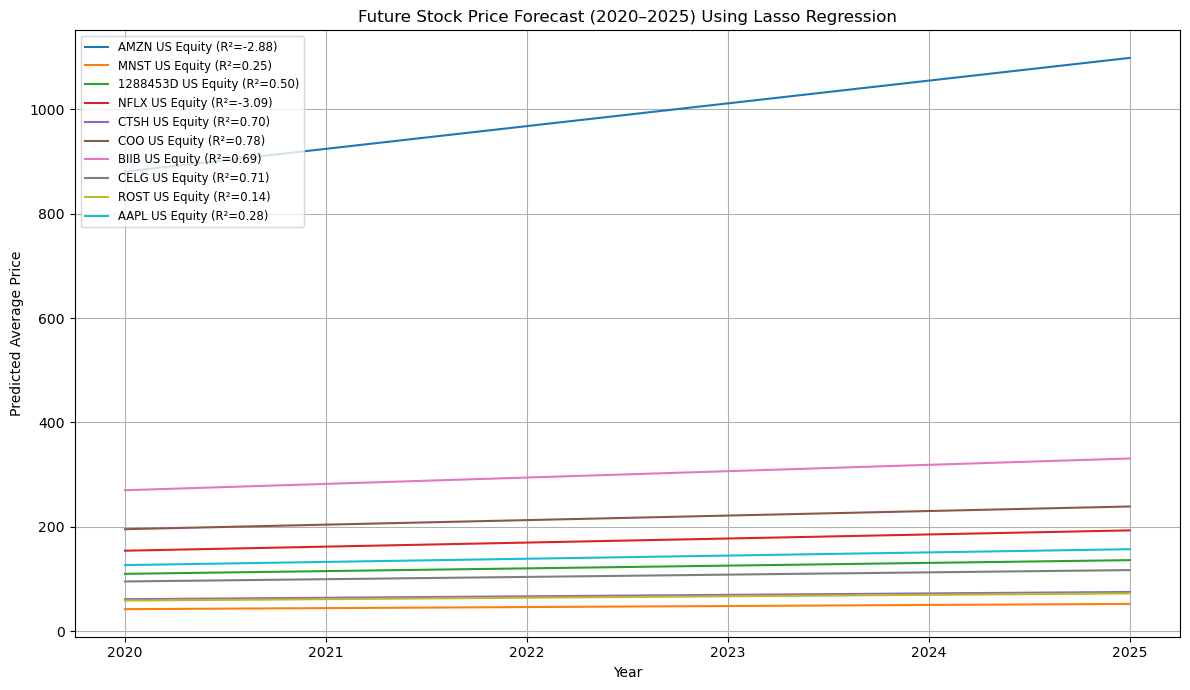

AMZN US Equity: MSE = 52795.59,  R² = -2.875
MNST US Equity: MSE = 71.38,  R² = 0.246
1288453D US Equity: MSE = 426.58,  R² = 0.499
NFLX US Equity: MSE = 1747.96,  R² = -3.086
CTSH US Equity: MSE = 83.65,  R² = 0.704
COO US Equity: MSE = 464.58,  R² = 0.783
BIIB US Equity: MSE = 2916.02,  R² = 0.686
CELG US Equity: MSE = 278.40,  R² = 0.710
ROST US Equity: MSE = 121.07,  R² = 0.143
AAPL US Equity: MSE = 681.75,  R² = 0.282


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# List of top 10 growth stocks
top_10_growth = ['AMZN US Equity', 'MNST US Equity', '1288453D US Equity', 'NFLX US Equity', 'CTSH US Equity', 
                 'COO US Equity', 'BIIB US Equity', 'CELG US Equity', 'ROST US Equity', 'AAPL US Equity']

# Feature (Year)
X = yearly_avg.index.values.reshape(-1, 1)

# Future years
future_years = np.arange(2020, 2026).reshape(-1, 1)

# Setup for plots and metrics
plt.figure(figsize=(12, 7))
r2_scores_lasso = {}
mse_scores = {}
predicted_data = {}

# Loop through each stock
for stock in top_10_growth:
    y = yearly_avg[stock].values.reshape(-1, 1)

    # Standardize years
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    future_scaled = scaler.transform(future_years)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train Lasso model
    lasso = Lasso(alpha=1)
    lasso.fit(X_train, y_train.ravel())

    # Evaluate on test set
    y_pred = lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2_scores_lasso[stock] = r2
    mse_scores[stock] = mse

    # Retrain on full data for forecasting
    lasso.fit(X_scaled, y.ravel())
    future_pred = lasso.predict(future_scaled)
    predicted_data[stock] = future_pred

    # Plot prediction
    label = f"{stock} (R²={r2:.2f})"
    plt.plot(future_years.flatten(), future_pred, label=label)

# Final plot formatting
plt.xlabel("Year")
plt.ylabel("Predicted Average Price")
plt.title("Future Stock Price Forecast (2020–2025) Using Lasso Regression")
plt.legend(loc="upper left", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()

#Print metrics
for stock in top_10_growth:
    print(f"{stock}: MSE = {mse_scores[stock]:.2f},  R² = {r2_scores_lasso[stock]:.3f}")

### Prediction of Top 10 Stocks using Decision Tree

Processing: AMZN US Equity
Decision Tree - MSE: 217725.69, R²: -0.086

Processing: MNST US Equity
Decision Tree - MSE: 1852.26, R²: -3.954

Processing: 1288453D US Equity
Decision Tree - MSE: 677.08, R²: 0.705

Processing: NFLX US Equity
Decision Tree - MSE: 4259.25, R²: 0.428

Processing: CTSH US Equity
Decision Tree - MSE: 1099.05, R²: -0.899

Processing: COO US Equity
Decision Tree - MSE: 2892.20, R²: 0.512

Processing: BIIB US Equity
Decision Tree - MSE: 8541.74, R²: 0.283

Processing: CELG US Equity
Decision Tree - MSE: 603.25, R²: 0.617

Processing: ROST US Equity
Decision Tree - MSE: 1352.79, R²: -1.015

Processing: AAPL US Equity
Decision Tree - MSE: 936.94, R²: 0.699



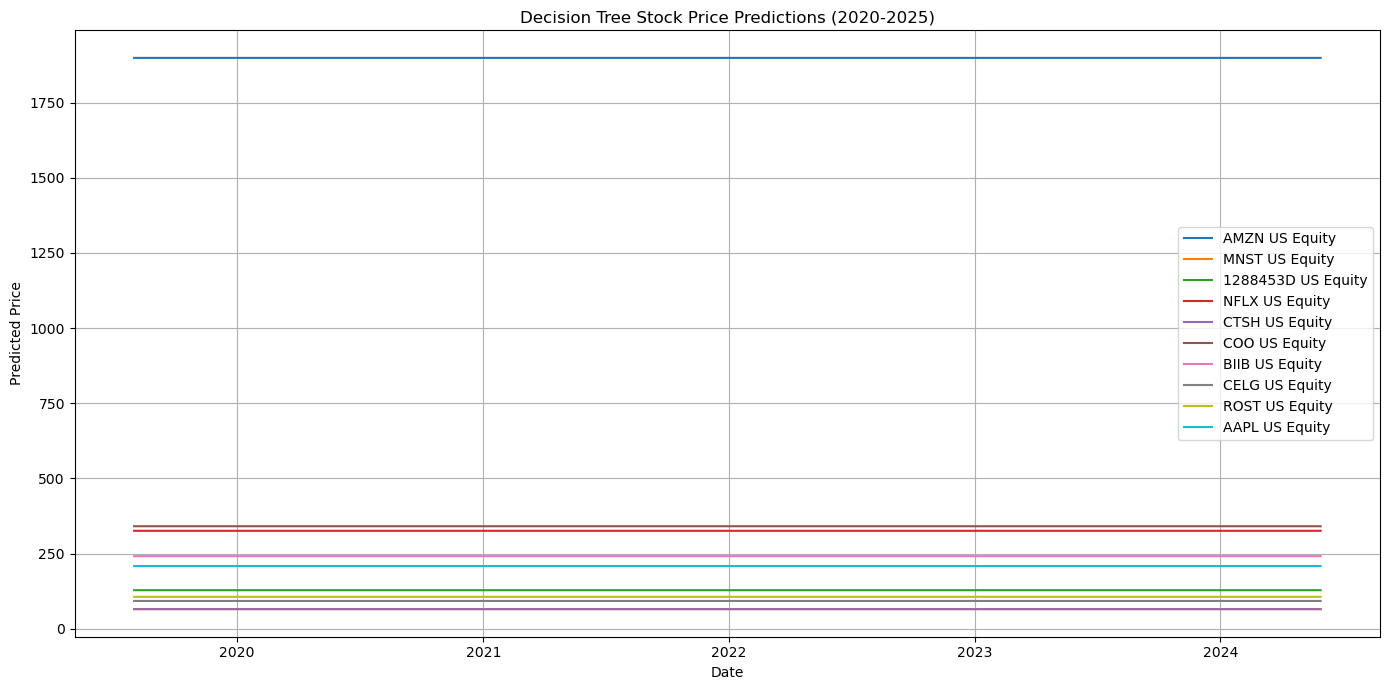

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Number of future days to predict
future_days = 252 * 5

# Dictionary to store future predictions
dt_predictions = {}

# Loop through top 10 stocks
for stock in top_10_companies:
    print(f"Processing: {stock}")
    
    data = stock_data_cleaned[[stock]].dropna()
    
    if len(data) < 10:
        print(f"Skipping {stock} due to insufficient data.")
        continue

    # Prepare the features (time step as number)
    data = data.copy()
    data['Time'] = np.arange(len(data))
    X = data[['Time']].values
    y = data[stock].values
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    future_scaled = scaler.transform(future_years)
    
    # Train Decision Tree model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict future prices
    last_time = X[-1, 0]
    future_X = np.arange(last_time + 1, last_time + future_days + 1).reshape(-1, 1)
    future_preds = model.predict(future_X)

    future_dates = pd.date_range(start=data.index[-1], periods=future_days + 1, freq='B')[1:]
    dt_predictions[stock] = (future_dates, future_preds)
    
    # Print metrics
    test_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, test_pred)
    r2 = r2_score(y_test, test_pred)
    print(f"Decision Tree - MSE: {mse:.2f}, R²: {r2:.3f}\n")

# Plot all predictions
plt.figure(figsize=(14, 7))
for stock, (dates, preds) in dt_predictions.items():
    plt.plot(dates, preds, label=stock)
plt.title("Decision Tree Stock Price Predictions (2020-2025)")
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Prediction of Top 10 Stocks using Random Forest

AMZN US Equity - MSE: 380.30, R²: 0.972
MNST US Equity - MSE: 1.50, R²: 0.984
1288453D US Equity - MSE: 17.53, R²: 0.979
NFLX US Equity - MSE: 21.16, R²: 0.951
CTSH US Equity - MSE: 6.27, R²: 0.978
COO US Equity - MSE: 131.86, R²: 0.938
BIIB US Equity - MSE: 1024.64, R²: 0.890
CELG US Equity - MSE: 34.35, R²: 0.964
ROST US Equity - MSE: 0.10, R²: 0.999
AAPL US Equity - MSE: 23.41, R²: 0.975


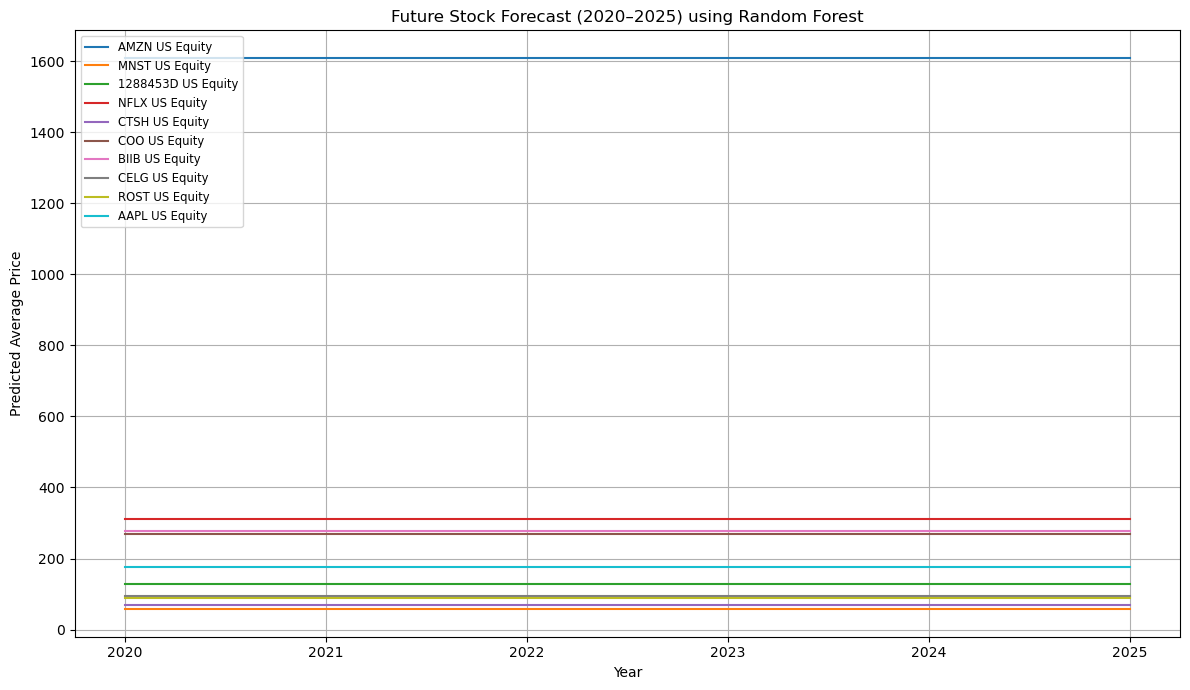

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Feature (years)
X = yearly_avg.index.values.reshape(-1, 1)
future_years = np.arange(2020, 2026).reshape(-1, 1)

# Combined forecast plot
plt.figure(figsize=(12, 7))

# Loop over stocks
for stock in top_10_growth:
    y = yearly_avg[stock].values

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict future prices
    future_pred = rf_model.predict(future_years)

    # Plot predicted prices
    plt.plot(future_years.flatten(), future_pred, label=stock)

    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{stock} - MSE: {mse:.2f}, R²: {r2:.3f}")

# Plot
plt.xlabel("Year")
plt.ylabel("Predicted Average Price")
plt.title("Future Stock Forecast (2020–2025) using Random Forest")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

### Prediction of Top 10 Stocks using ARIMA

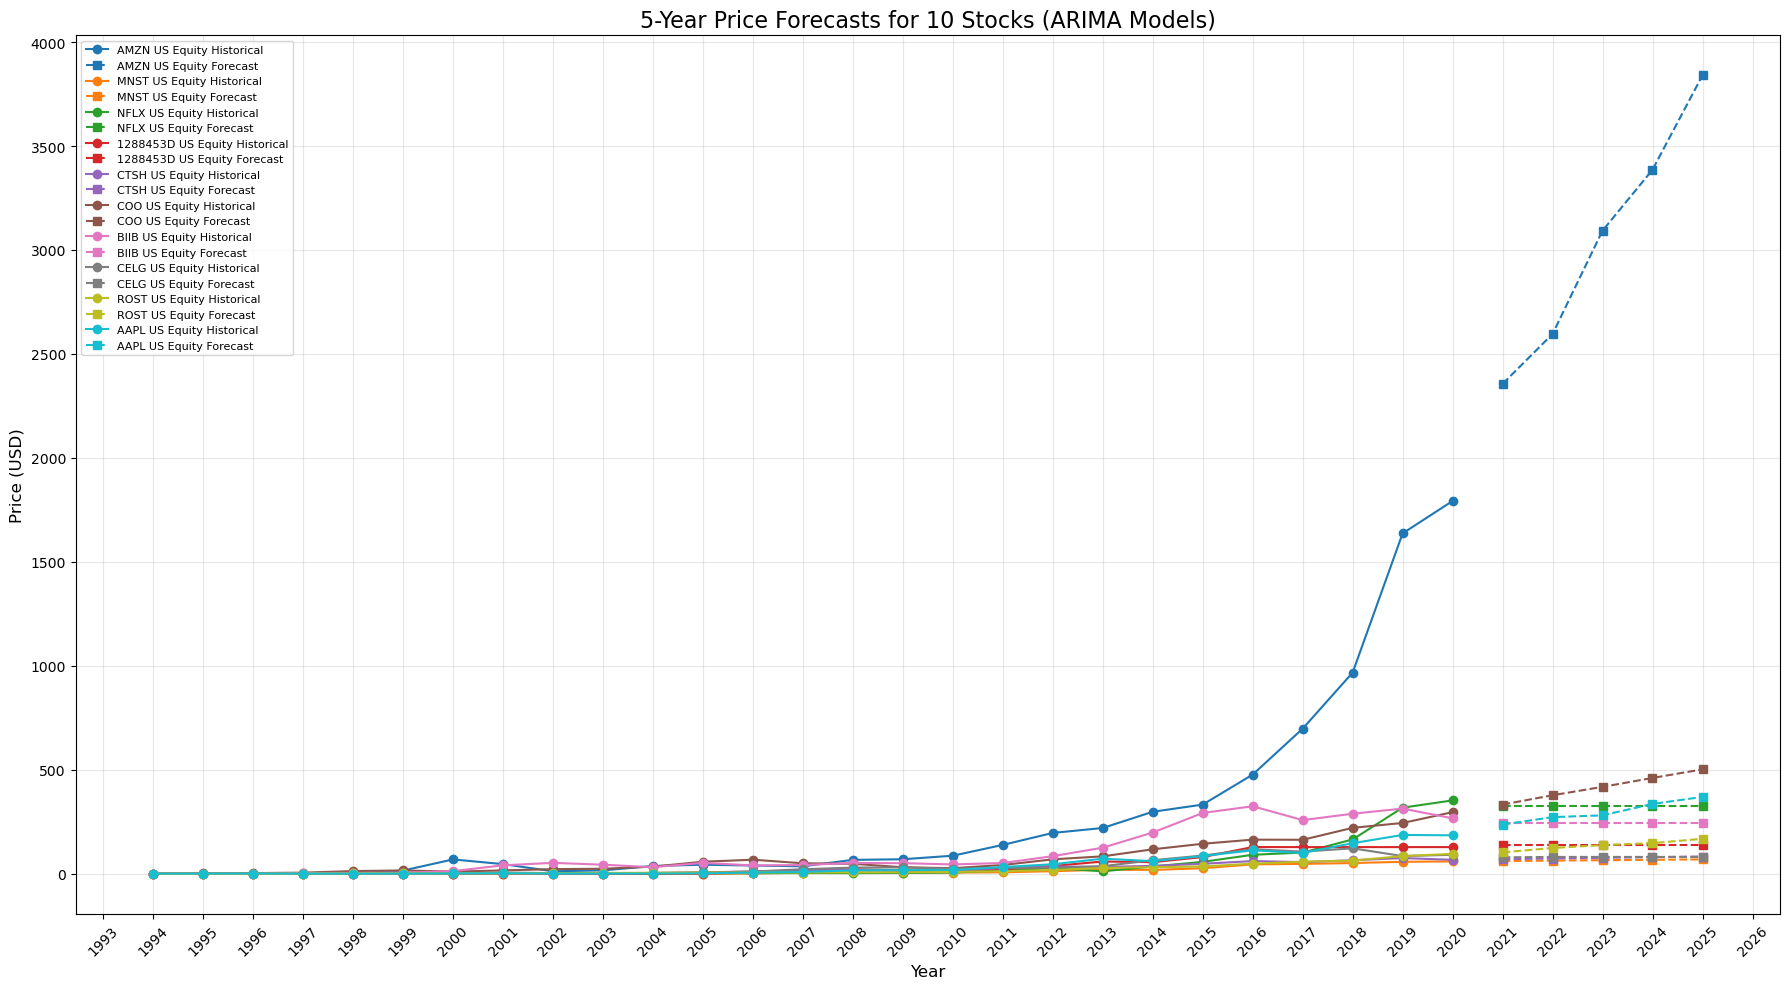

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pmdarima import auto_arima

# Configuration
CUTOFF_DATE = '2019-07-31'
FORECAST_YEARS = 5
custom_stocks = [
    'AMZN US Equity', 'MNST US Equity', 'NFLX US Equity', '1288453D US Equity',
    'CTSH US Equity', 'COO US Equity', 'BIIB US Equity',
    'CELG US Equity', 'ROST US Equity', 'AAPL US Equity'
]

# Load and preprocess data
df = pd.read_csv('adjprice.csv', index_col='Date', parse_dates=True)
df = df[df.index <= CUTOFF_DATE].dropna(axis=1, how='all')

# Initialize plot
plt.figure(figsize=(18, 10))

# Store all forecast data to plot confidence intervals later
all_forecasts = []

# Colors for each line
colors = plt.cm.get_cmap('tab10', len(custom_stocks))

# Loop through each stock
for idx, stock in enumerate(custom_stocks):
    if stock not in df.columns:
        print(f"{stock} not found in dataset")
        continue

    series = df[stock].ffill().dropna()
    yearly_avgsss = series.resample('YE').mean()

    try:
        model = auto_arima(yearly_avgsss, seasonal=False, stepwise=True, suppress_warnings=True)
        forecast, conf_int = model.predict(n_periods=FORECAST_YEARS, return_conf_int=True)

        last_year = yearly_avgsss.index[-1].year
        forecast_dates = pd.date_range(start=f'{last_year+1}-12-31', periods=FORECAST_YEARS, freq='YE')

        # Plot historical data
        plt.plot(yearly_avgsss.index, yearly_avgsss, 
                 label=f'{stock} Historical', 
                 linestyle='-', marker='o', color=colors(idx))

        # Plot forecast
        plt.plot(forecast_dates, forecast, 
                 label=f'{stock} Forecast', 
                 linestyle='--', marker='s', color=colors(idx))

    except Exception as e:
        print(f"Forecast failed for {stock}: {str(e)}")

# Formatting
plt.title('5-Year Price Forecasts for 10 Stocks (ARIMA Models)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left', fontsize=8)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Prediction of Top 10 Stocks using Monte Carlo Simulation


Simulating: AMZN US Equity


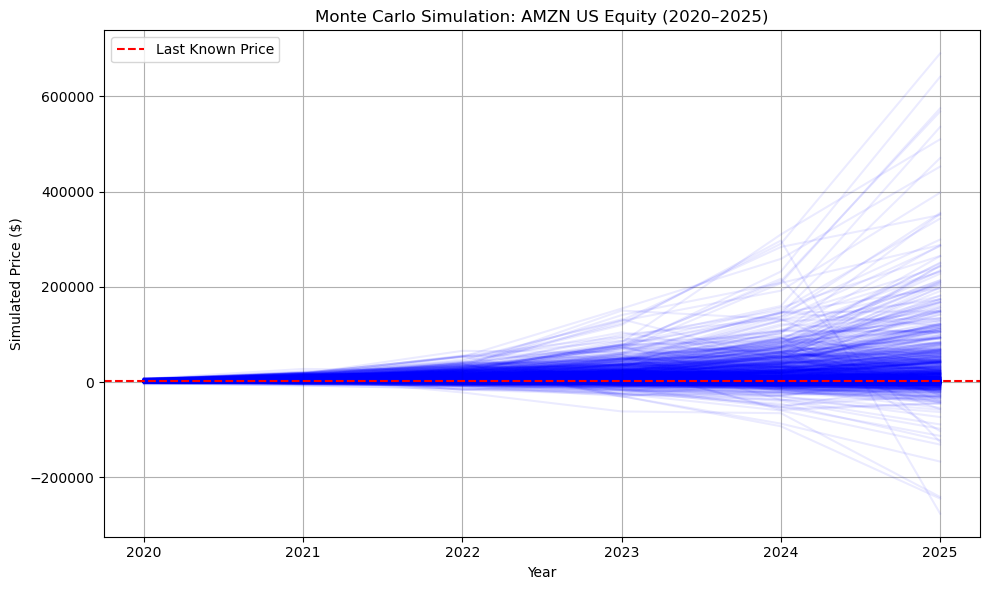

Starting price for AMZN US Equity (end of 2019): 1792.85
Mean simulated prices per year:
2020     2872.66
2021     4681.94
2022     7332.02
2023    11571.62
2024    17683.19
2025    28473.39
dtype: float64

Simulating: MNST US Equity


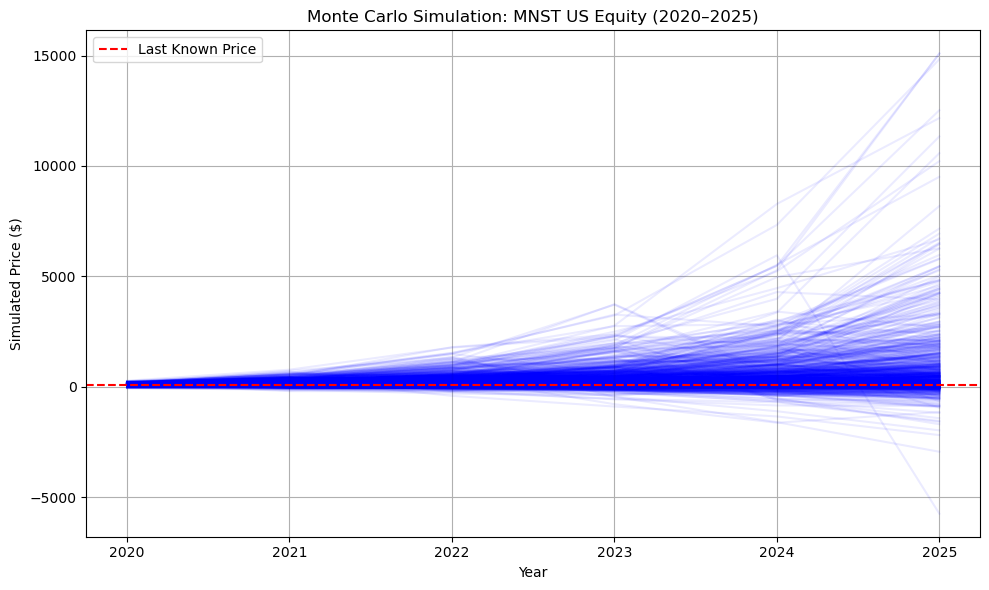

Starting price for MNST US Equity (end of 2019): 59.61
Mean simulated prices per year:
2020     94.02
2021    141.87
2022    210.78
2023    297.62
2024    448.45
2025    717.29
dtype: float64

Simulating: 1288453D US Equity


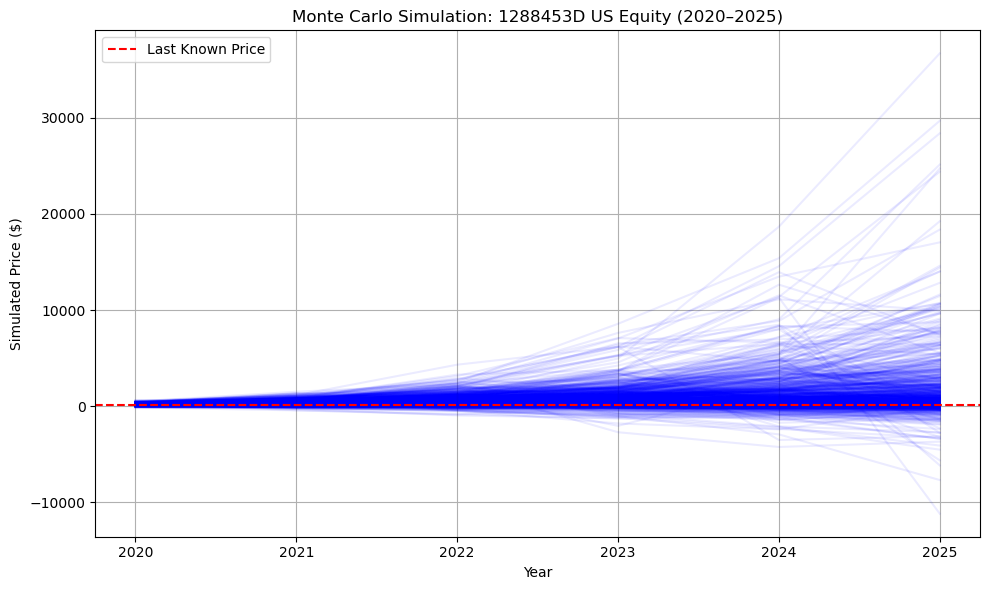

Starting price for 1288453D US Equity (end of 2019): 128.38
Mean simulated prices per year:
2020     194.33
2021     300.79
2022     452.64
2023     665.57
2024    1004.41
2025    1377.14
dtype: float64

Simulating: NFLX US Equity


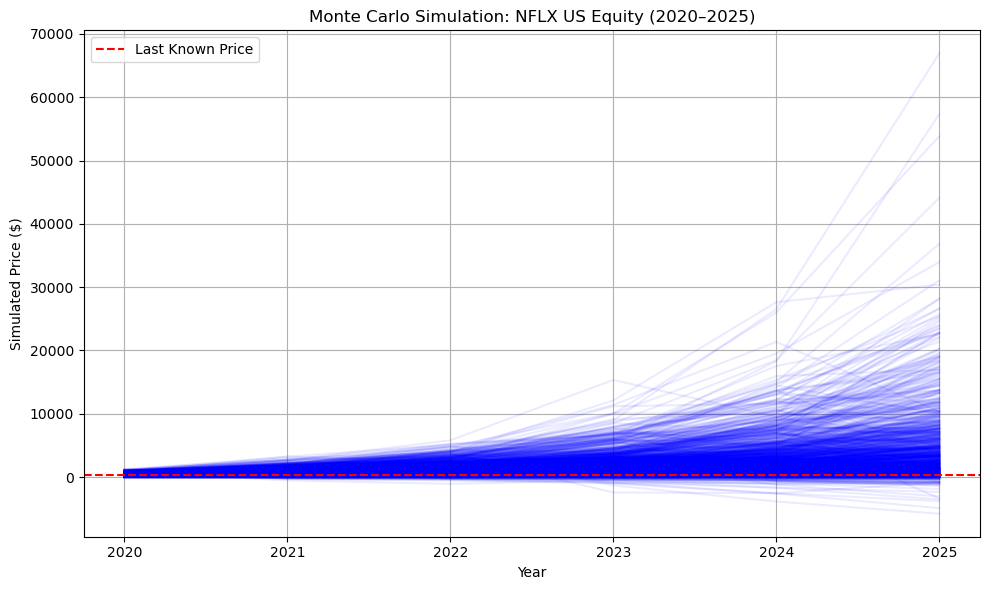

Starting price for NFLX US Equity (end of 2019): 353.07
Mean simulated prices per year:
2020     543.46
2021     849.44
2022    1309.55
2023    2046.45
2024    3198.40
2025    4938.10
dtype: float64

Simulating: CTSH US Equity


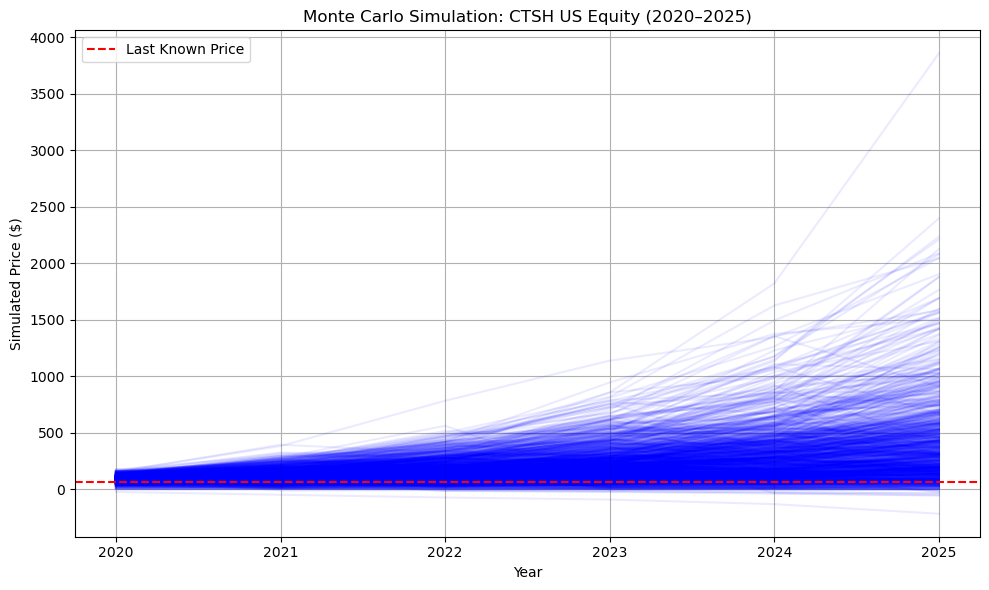

Starting price for CTSH US Equity (end of 2019): 67.20
Mean simulated prices per year:
2020     90.95
2021    122.23
2022    165.18
2023    225.53
2024    299.16
2025    411.43
dtype: float64

Simulating: COO US Equity


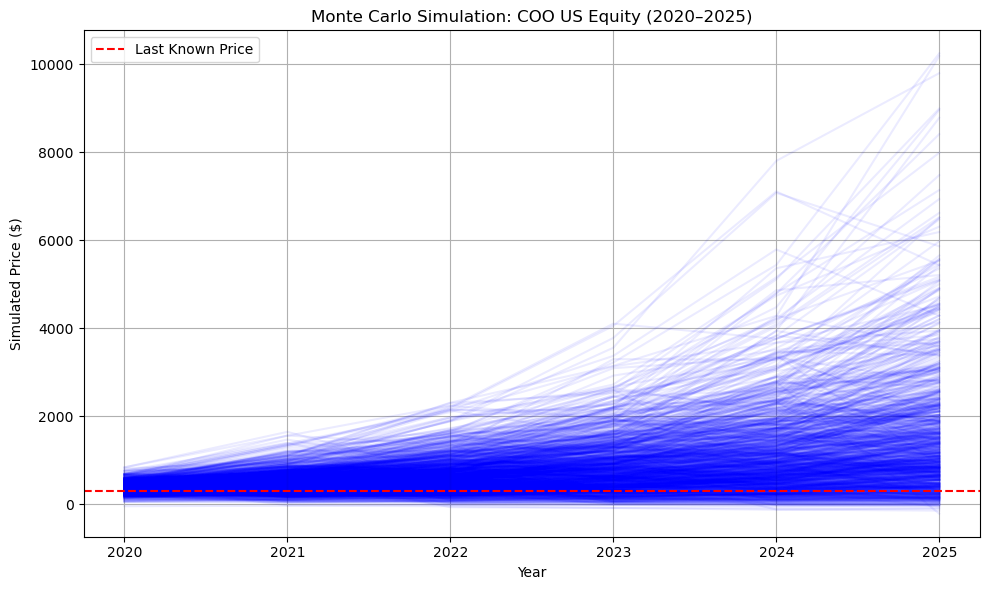

Starting price for COO US Equity (end of 2019): 296.44
Mean simulated prices per year:
2020     394.53
2021     515.49
2022     667.73
2023     866.85
2024    1162.62
2025    1547.68
dtype: float64

Simulating: BIIB US Equity


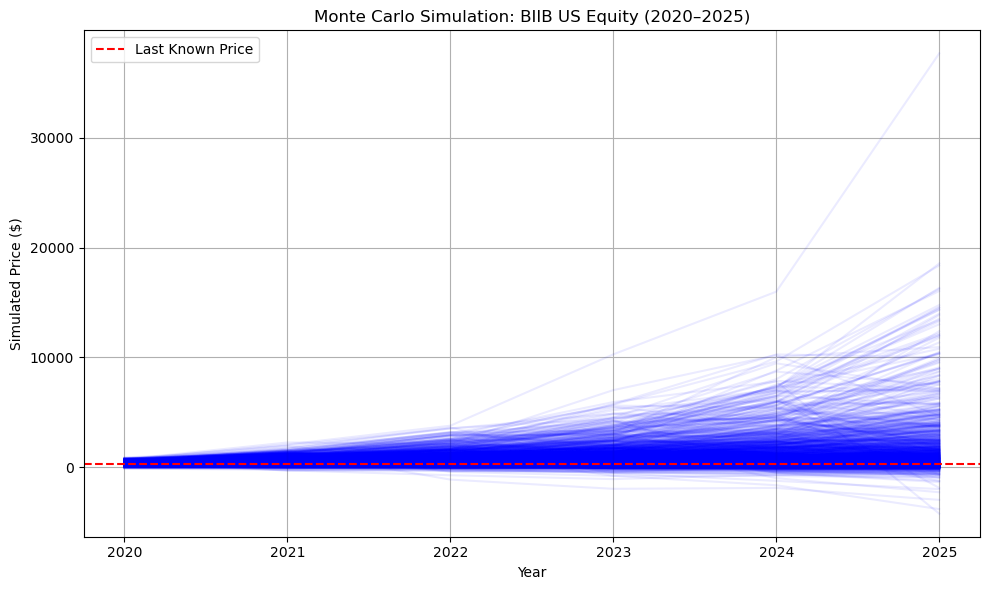

Starting price for BIIB US Equity (end of 2019): 266.81
Mean simulated prices per year:
2020     370.07
2021     522.69
2022     716.09
2023     975.45
2024    1351.63
2025    1814.46
dtype: float64

Simulating: CELG US Equity


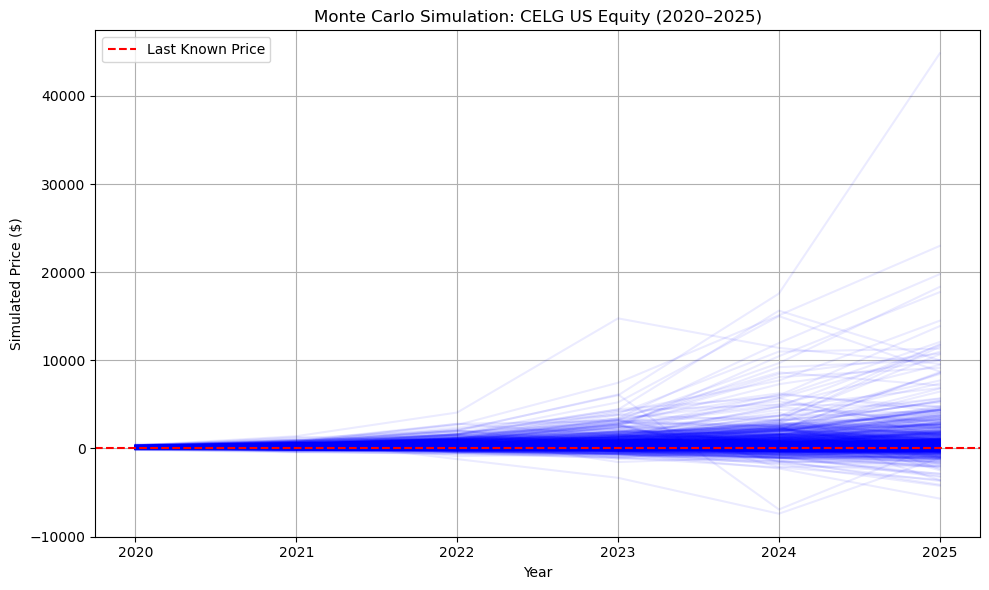

Starting price for CELG US Equity (end of 2019): 91.38
Mean simulated prices per year:
2020    128.50
2021    186.17
2022    264.90
2023    387.72
2024    559.83
2025    754.65
dtype: float64

Simulating: ROST US Equity


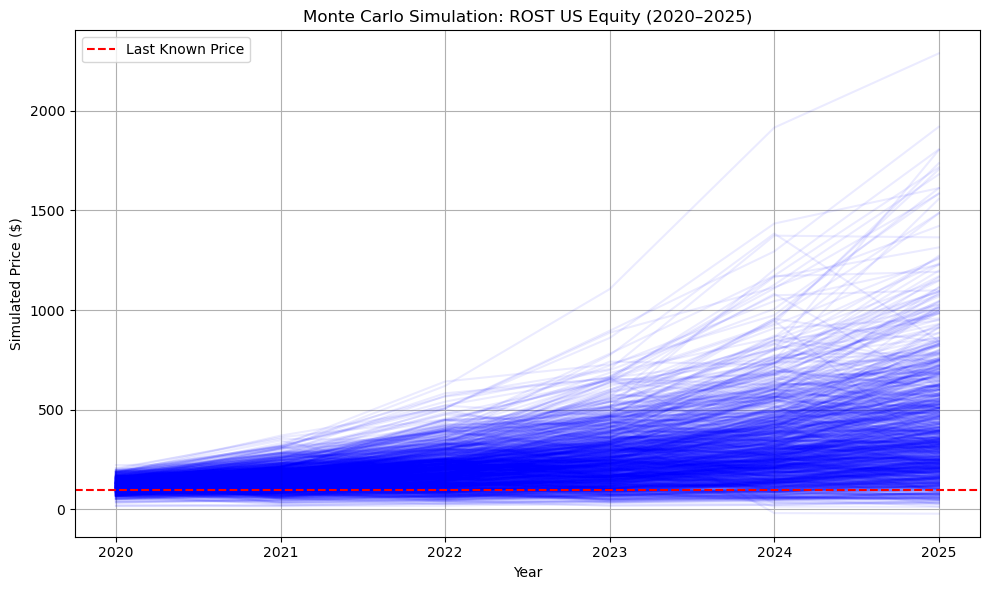

Starting price for ROST US Equity (end of 2019): 95.82
Mean simulated prices per year:
2020    120.54
2021    153.77
2022    199.50
2023    252.75
2024    327.36
2025    414.30
dtype: float64

Simulating: AAPL US Equity


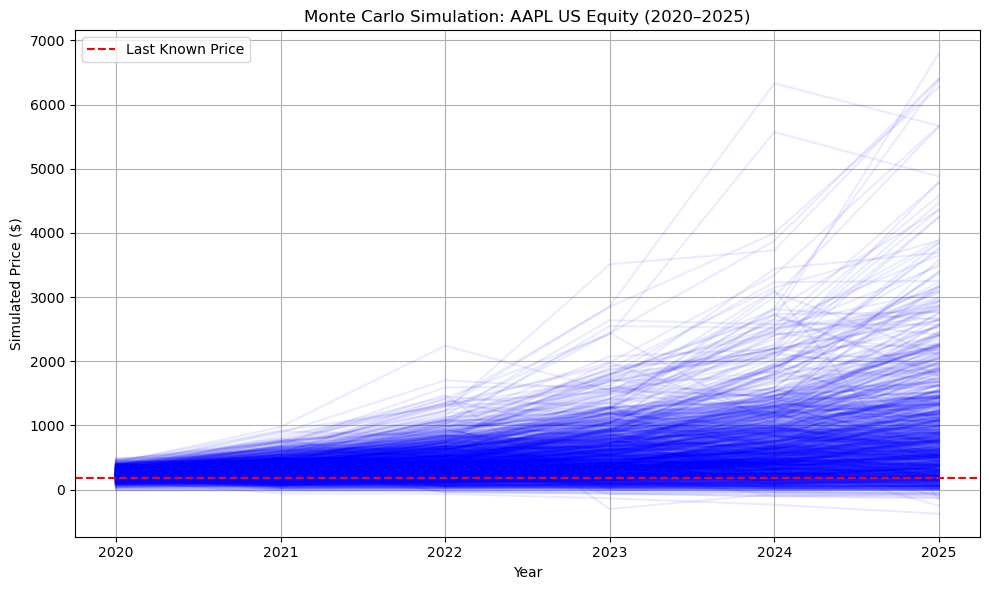

Starting price for AAPL US Equity (end of 2019): 185.02
Mean simulated prices per year:
2020    237.71
2021    311.56
2022    416.52
2023    550.55
2024    716.55
2025    947.37
dtype: float64


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Stock list
top_10_growth = ['AMZN US Equity', 'MNST US Equity', '1288453D US Equity', 'NFLX US Equity', 
    'CTSH US Equity', 'COO US Equity', 'BIIB US Equity', 'CELG US Equity', 'ROST US Equity', 'AAPL US Equity']

# Simulation settings
num_simulations = 1000
num_years = 6  # 2020 to 2025
future_years = list(range(2020, 2026))

# Random seed for reproducibility
np.random.seed(123)

# Load and preprocess data
df = pd.read_csv('adjprice.csv', index_col='Date', parse_dates=True)
df = df[df.index <= '2019-07-31'].dropna(axis=1, how='all')

# compute yearly averages for each stock
yearly_avgs = {}
for stock in top_10_growth:
    if stock in df.columns:
        series = df[stock].ffill().dropna()
        yearly_avgss = series.resample('YE').mean()
        yearly_avgs[stock] = yearly_avgss
    else:
        print(f"{stock} not found in data.")

# Dictionary to store mean forecast per stock
mean_forecast_per_stock = {}

# Run simulation for each stock
for stock in top_10_growth:
    if stock not in yearly_avgs:
        continue

    print(f"\nSimulating: {stock}")
    
    prices = yearly_avgs[stock]
    returns = prices.pct_change().dropna()

    mu = returns.mean()
    sigma = returns.std()
    last_price = prices.iloc[-1]

    # Prepare simulation matrix
    simulation_data = np.zeros((num_years, num_simulations))

    # Monte Carlo simulation
    for i in range(num_simulations):
        price = last_price
        for year in range(num_years):
            shock = np.random.normal(loc=mu, scale=sigma)
            price *= (1 + shock)
            simulation_data[year, i] = price

    # Store the mean prices for plotting
    simulation_df = pd.DataFrame(simulation_data, index=future_years)
    mean_prices = simulation_df.mean(axis=1)
    mean_forecast_per_stock[stock] = mean_prices

    # Plot simulations
    plt.figure(figsize=(10, 6))
    plt.plot(simulation_df, alpha=0.08, color='blue')
    plt.axhline(y=last_price, color='red', linestyle='--', label='Last Known Price')
    plt.title(f'Monte Carlo Simulation: {stock} (2020–2025)')
    plt.xlabel('Year')
    plt.ylabel('Simulated Price ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"Starting price for {stock} (end of 2019): {last_price:.2f}")
    print("Mean simulated prices per year:")
    print(mean_prices.round(2))

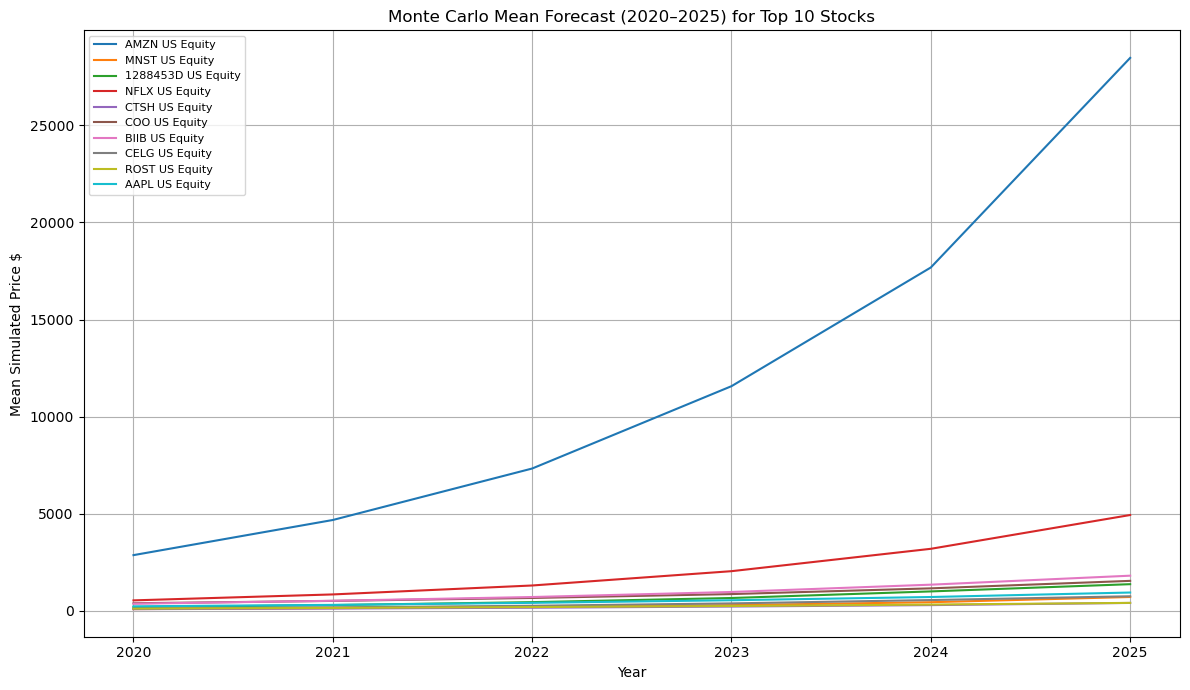

In [37]:
# Plot all in one line chart
plt.figure(figsize=(12, 7))
for stock, mean_prices in mean_forecast_per_stock.items():
    plt.plot(future_years, mean_prices, label=stock)

plt.title("Monte Carlo Mean Forecast (2020–2025) for Top 10 Stocks")
plt.xlabel("Year")
plt.ylabel("Mean Simulated Price $")
plt.legend(loc="upper left", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
yearly_avg

,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,0772031D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
Year,,,,,,,,,,,,,,,,,,,,,
1993,12.630372,14.232747,7.918696,8.426668,10.229526,56.872964,16.184505,7.209174,26.616612,4.348300,...,24.920300,143881.653562,4.034600,25.392800,28.009100,7.081897,6.818473,25.804794,24.886600,29.980000
1994,11.676695,20.149318,8.480758,5.899327,9.375685,70.788659,15.691691,7.059332,23.419443,4.348300,...,24.920300,133566.383317,4.034600,25.392800,28.009100,10.263699,6.686587,19.606442,24.886600,29.980000
1995,12.198784,26.912217,10.797010,5.900133,12.665068,92.839909,18.635049,7.287393,22.368739,4.348300,...,24.920300,107292.926265,4.034600,25.392800,28.009100,8.422945,9.342819,20.308168,24.886600,29.980000
1996,15.089960,33.542028,8.132369,6.605906,12.916624,169.080472,22.376771,9.385709,27.835604,4.348300,...,24.920300,84115.570143,4.034600,25.392800,28.009100,10.975751,14.841573,21.610111,24.886600,29.980000
1997,18.774035,35.788293,14.038288,10.098570,9.136945,173.500000,23.853972,12.376596,36.707261,6.818558,...,24.920300,149081.425065,4.139668,25.392800,28.009100,10.259075,25.975105,28.507574,24.886600,29.980000
1998,21.891836,24.684971,7.515258,15.723608,7.694054,173.500000,20.582953,12.463515,54.930183,14.507575,...,27.814808,119491.678778,4.869896,25.392800,28.009100,2.410570,36.871250,42.830718,24.886600,29.980000
1999,20.955611,29.063761,10.964167,14.207132,5.685025,173.500000,18.722212,12.731147,59.312500,27.547996,...,43.380682,110959.885443,6.989756,25.392800,28.009100,0.250705,46.391107,44.312500,24.886600,29.980000
2000,20.539750,49.872639,21.449986,11.633405,6.371762,173.500000,24.176746,15.035943,59.312500,36.587947,...,51.359973,109487.860918,4.222919,25.392800,28.009100,0.009484,37.795514,44.312500,24.886600,29.980000
2001,23.573178,50.010492,12.639737,17.988079,11.057460,173.500000,26.183933,17.850547,59.312500,22.338699,...,48.062500,138364.102114,5.892753,25.392800,27.723159,0.001000,42.754872,44.312500,24.886600,29.980000


### Predicting the Top 10 Stocks Prices using LSTM

Processing: AMZN US Equity
Processing: MNST US Equity
Processing: 1288453D US Equity
Processing: NFLX US Equity
Processing: CTSH US Equity
Processing: COO US Equity
Processing: BIIB US Equity
Processing: CELG US Equity
Processing: ROST US Equity
Processing: AAPL US Equity


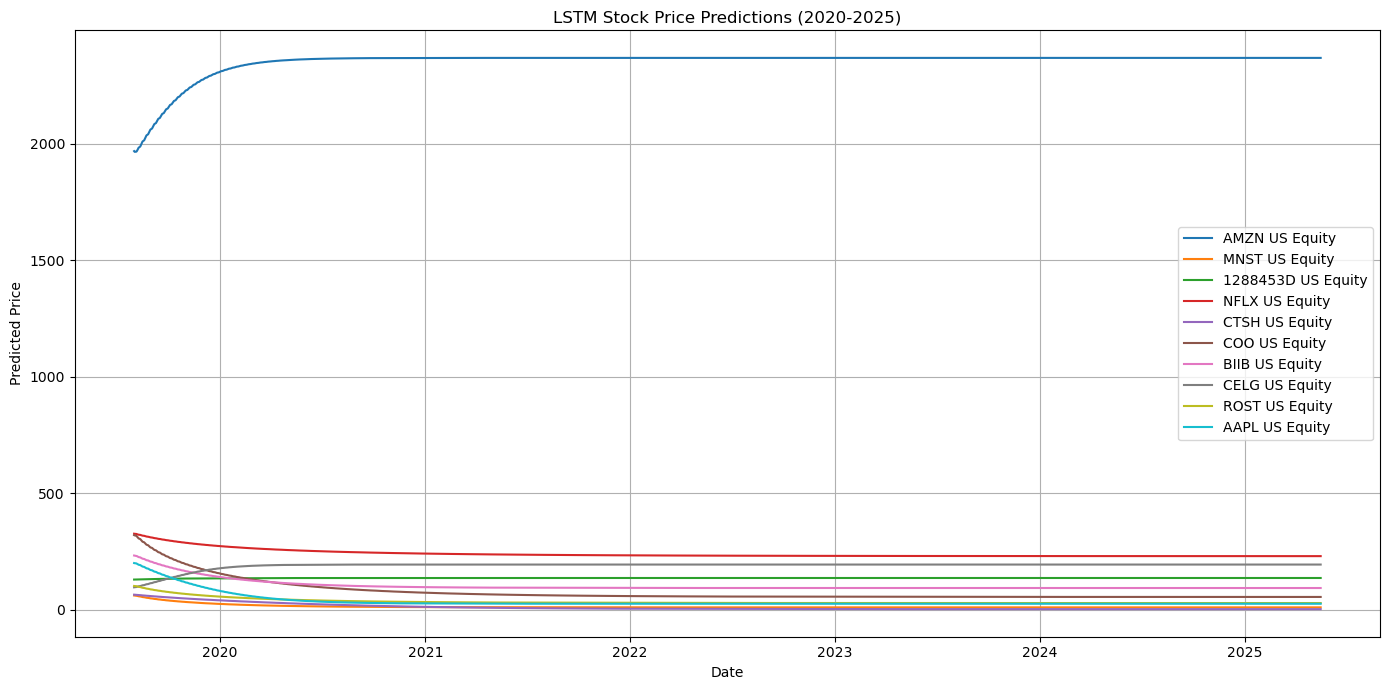

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings

warnings.filterwarnings("ignore")

# Parameters
sequence_length = 60
future_days = 252 * 6 

# Store predictions for plotting
predictions_dict = {}

for stock in top_10_companies:
    print(f"Processing: {stock}")
    
    #Prepare and clean data
    data = stock_data_cleaned[[stock]].dropna()
    if len(data) < sequence_length + future_days:
        print(f"Skipping {stock} due to insufficient data.")
        continue

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)

    #Create sequences
    X, y = [], []
    for i in range(sequence_length, len(scaled)):
        X.append(scaled[i-sequence_length:i, 0])
        y.append(scaled[i, 0])
    X = np.array(X).reshape(-1, sequence_length, 1)
    y = np.array(y)

    # Build and train model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=10, batch_size=32, verbose=0)

    #Predict future prices
    last_seq = scaled[-sequence_length:]
    future = []
    for _ in range(future_days):
        input_seq = last_seq.reshape(1, sequence_length, 1)
        next_val = model.predict(input_seq, verbose=0)[0, 0]
        future.append(next_val)
        last_seq = np.append(last_seq[1:], [[next_val]], axis=0)

    future_prices = scaler.inverse_transform(np.array(future).reshape(-1, 1)).flatten()
    future_dates = pd.date_range(start=data.index[-1], periods=future_days+1, freq='B')[1:]
    predictions_dict[stock] = (future_dates, future_prices)

#Plot all predictions
plt.figure(figsize=(14, 7))
for stock, (dates, preds) in predictions_dict.items():
    plt.plot(dates, preds, label=stock)
plt.title("LSTM Stock Price Predictions (2020-2025)")
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparing R^2 values of Regression Models

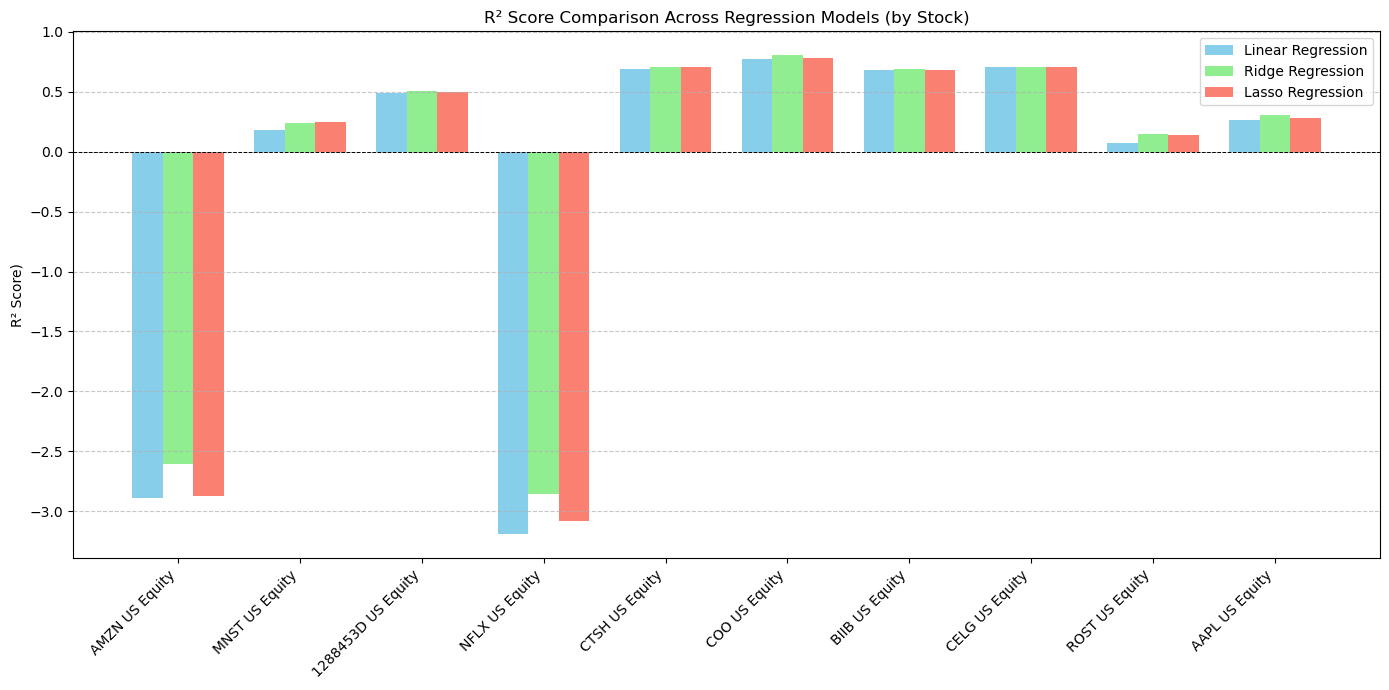

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# List of stocks
stocks = top_10_growth

# R^2 values
ridge_r2 = [r2_scores_ridge[stock] for stock in stocks]
lasso_r2 = [r2_scores_lasso[stock] for stock in stocks]
linear_r2 = [r2_scores_linear[stock] for stock in stocks]

x = np.arange(len(stocks))
width = 0.25

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(x - width, linear_r2, width=width, label='Linear Regression', color='skyblue')
plt.bar(x, ridge_r2, width=width, label='Ridge Regression', color='lightgreen')
plt.bar(x + width, lasso_r2, width=width, label='Lasso Regression', color='salmon')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.xticks(x, stocks, rotation=45, ha='right')
plt.ylabel("R² Score)")
plt.title("R² Score Comparison Across Regression Models (by Stock)")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

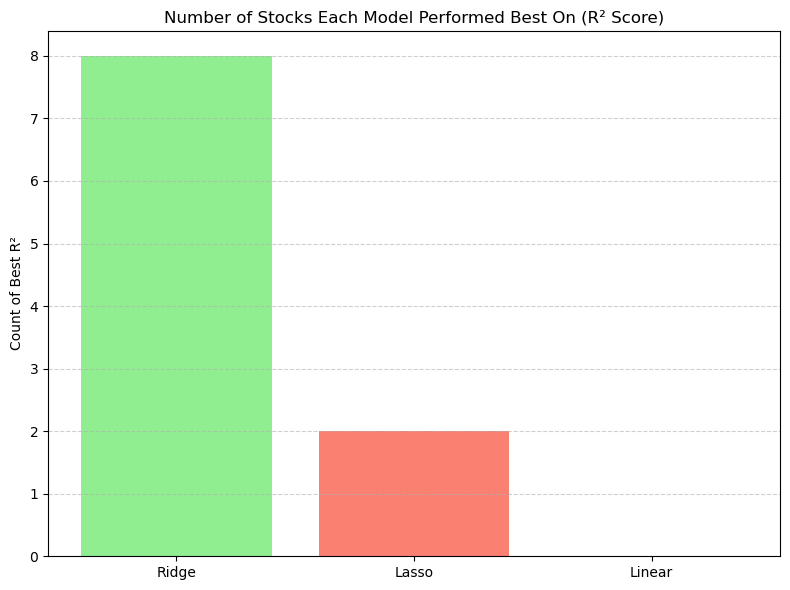

In [43]:
# Count best model for each stock
best_counts = {'Ridge': 0, 'Lasso': 0, 'Linear': 0}

for stock in r2_scores_ridge:
    ridge_r2 = r2_scores_ridge[stock]
    lasso_r2 = r2_scores_lasso[stock]
    linear_r2 = r2_scores_linear[stock]
    
    best_model = max(
        [('Ridge', ridge_r2), ('Lasso', lasso_r2), ('Linear', linear_r2)],
        key=lambda x: x[1]
    )[0]
    
    best_counts[best_model] += 1

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(best_counts.keys(), best_counts.values(), color=['lightgreen', 'salmon', 'skyblue'])
plt.title("Number of Stocks Each Model Performed Best On (R² Score)")
plt.ylabel("Count of Best R²")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Portfolio Building

### Categorizing the Top 10 Stocks Volatility as a Percentage (%) 

Most volatile (Top 10): AMZN US Equity (Volatility: 119.64%)
Least volatile (Top 10): ROST US Equity (Volatility: 34.92%)


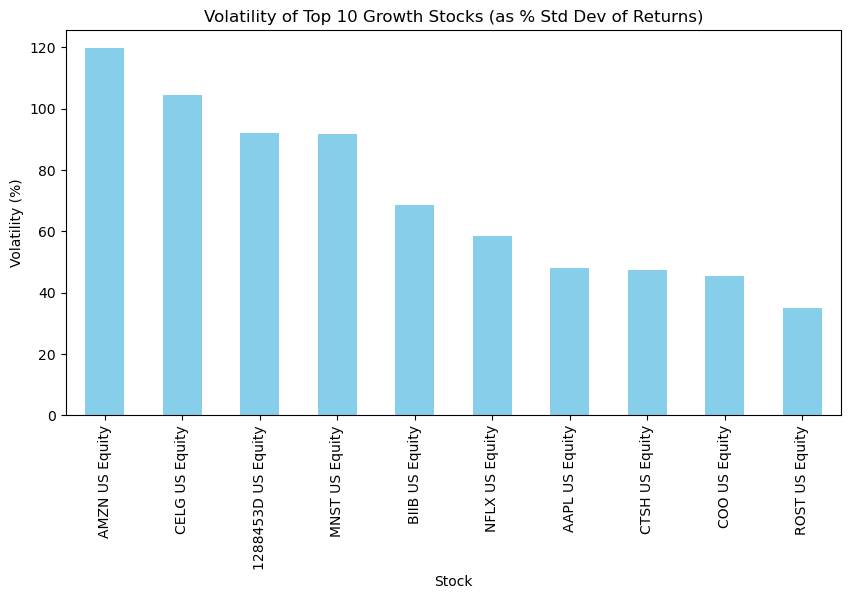

In [46]:
import matplotlib.pyplot as plt

# Remove the Year column
price_only = yearly_avg.drop(columns=yearly_avg.columns[0])

# Filter to top 10 stocks only
price_top10 = price_only[top10_stocks]

# Calculate returns
returns_top10 = price_top10.pct_change()

# Calculate standard deviation of returns (volatility)
volatility_top10 = returns_top10.std() * 100  # Convert to percentage

# Find the least and most volatile among the top 10
most_volatile = volatility_top10.idxmax()
least_volatile = volatility_top10.idxmin()

most_volatile_value = volatility_top10.max()
least_volatile_value = volatility_top10.min()

# Print results
print(f"Most volatile (Top 10): {most_volatile} (Volatility: {most_volatile_value:.2f}%)")
print(f"Least volatile (Top 10): {least_volatile} (Volatility: {least_volatile_value:.2f}%)")

# Plot the graph
volatility_top10.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Volatility of Top 10 Growth Stocks (as % Std Dev of Returns)')
plt.ylabel('Volatility (%)')
plt.xlabel('Stock')
plt.show()

### Categoriszing Each Stock based on Risk Level

In [48]:
# Categorize into 3 risk groups using quantiles
risk_categories = pd.qcut(volatility_top10, q=3, labels=['Low Risk', 'Medium Risk', 'High Risk'])

# Combine into DataFrame
volatility_summary = pd.DataFrame({'Volatility (%)': volatility_top10.round(2),'Risk Category': risk_categories})

print(volatility_summary.sort_values(by='Volatility (%)', ascending=False))

                    Volatility (%) Risk Category
AMZN US Equity              119.64     High Risk
CELG US Equity              104.33     High Risk
1288453D US Equity           92.06     High Risk
MNST US Equity               91.60     High Risk
BIIB US Equity               68.67   Medium Risk
NFLX US Equity               58.54   Medium Risk
AAPL US Equity               48.07      Low Risk
CTSH US Equity               47.32      Low Risk
COO US Equity                45.40      Low Risk
ROST US Equity               34.92      Low Risk


### Prediction of Annual Average Returns on the Stocks using Ridge Regression

In [50]:
avg_returns = {}

for stock, (years, preds) in ridge_predictions.items():
    # Calculate year-over-year returns (%)
    returns = (np.diff(preds) / preds[:-1]) * 100  
    
    # Average return over the prediction period
    avg_return = np.mean(returns)
    avg_returns[stock] = avg_return

# Print average predicted returns
print("\nAverage Predicted Annual Returns (2020–2025):")
for stock, avg in sorted(avg_returns.items(), key=lambda x: x[1], reverse=True):
    print(f"{stock}: {avg:.2f}%")


Average Predicted Annual Returns (2020–2025):
NFLX US Equity: 4.60%
AMZN US Equity: 4.47%
MNST US Equity: 4.40%
AAPL US Equity: 4.36%
1288453D US Equity: 4.34%
ROST US Equity: 4.33%
CELG US Equity: 4.18%
CTSH US Equity: 4.17%
BIIB US Equity: 4.16%
COO US Equity: 4.12%


### Predicted Prices for the Top 10 Stocks for 2020 and 2025

In [52]:
# Dictionary to store start and end prices
start_end_prices = {}

print("\nPredicted Prices for 2020 and 2025:")
for stock, (years, preds) in ridge_predictions.items():
    # Find index of 2020 and 2025
    idx_2020 = list(years).index(2020)
    idx_2025 = list(years).index(2025)
    
    start_price = preds[idx_2020]
    end_price = preds[idx_2025]
    
    start_end_prices[stock] = {'2020': start_price, '2025': end_price}
    print(f"{stock}: 2020 = {start_price:.2f}, 2025 = {end_price:.2f}")


Predicted Prices for 2020 and 2025:
AMZN US Equity: 2020 = 926.52, 2025 = 1152.96
MNST US Equity: 2020 = 44.66, 2025 = 55.39
1288453D US Equity: 2020 = 112.20, 2025 = 138.78
NFLX US Equity: 2020 = 164.03, 2025 = 205.35
CTSH US Equity: 2020 = 62.56, 2025 = 76.74
COO US Equity: 2020 = 196.05, 2025 = 239.89
BIIB US Equity: 2020 = 261.37, 2025 = 320.50
CELG US Equity: 2020 = 95.00, 2025 = 116.61
ROST US Equity: 2020 = 61.56, 2025 = 76.10
AAPL US Equity: 2020 = 130.36, 2025 = 161.37


### Percentage Increase in Stock Prices from 2020 to 2025

In [54]:
print("\nPercentage Increase from 2020 to 2025:")
for stock, prices in start_end_prices.items():
    start_price = prices['2020']
    end_price = prices['2025']
    
    percentage_increase = ((end_price - start_price) / start_price) * 100
    print(f"{stock}: {percentage_increase:.2f}%")


Percentage Increase from 2020 to 2025:
AMZN US Equity: 24.44%
MNST US Equity: 24.04%
1288453D US Equity: 23.69%
NFLX US Equity: 25.19%
CTSH US Equity: 22.66%
COO US Equity: 22.36%
BIIB US Equity: 22.62%
CELG US Equity: 22.75%
ROST US Equity: 23.60%
AAPL US Equity: 23.79%


# Portfolio

In [56]:
percentage_returns = {"AMZN US Equity": 24.44,
"MNST US Equity": 24.04,
"1288453D US Equity": 23.69,
"NFLX US Equity": 25.19,
"CTSH US Equity": 22.66,
"COO US Equity": 22.36,
"BIIB US Equity": 22.62,
"CELG US Equity": 22.75,
"ROST US Equity": 23.60,
"AAPL US Equity": 23.79}

# Convert return dict to Dataframe
returns_df = pd.DataFrame.from_dict(percentage_returns, orient='index', columns=['Predicted Return (%)'])

# Combine with risk categories
investment_summary = volatility_summary.join(returns_df)

# Sort by Risk Category
investment_summary_sorted = investment_summary.sort_values(by=['Risk Category', 'Predicted Return (%)'], ascending=[True, False])

#Print
print(investment_summary_sorted)

                    Volatility (%) Risk Category  Predicted Return (%)
AAPL US Equity               48.07      Low Risk                 23.79
ROST US Equity               34.92      Low Risk                 23.60
CTSH US Equity               47.32      Low Risk                 22.66
COO US Equity                45.40      Low Risk                 22.36
NFLX US Equity               58.54   Medium Risk                 25.19
BIIB US Equity               68.67   Medium Risk                 22.62
AMZN US Equity              119.64     High Risk                 24.44
MNST US Equity               91.60     High Risk                 24.04
1288453D US Equity           92.06     High Risk                 23.69
CELG US Equity              104.33     High Risk                 22.75


In [57]:
avg_return_by_risk = investment_summary.groupby('Risk Category')['Predicted Return (%)'].mean().round(2)
print("\nAverage Predicted Return by Risk Category (2020–2025):")
print(avg_return_by_risk)


Average Predicted Return by Risk Category (2020–2025):
Risk Category
Low Risk       23.10
Medium Risk    23.90
High Risk      23.73
Name: Predicted Return (%), dtype: float64


### Risk Distribution for the Top 10 Stocks

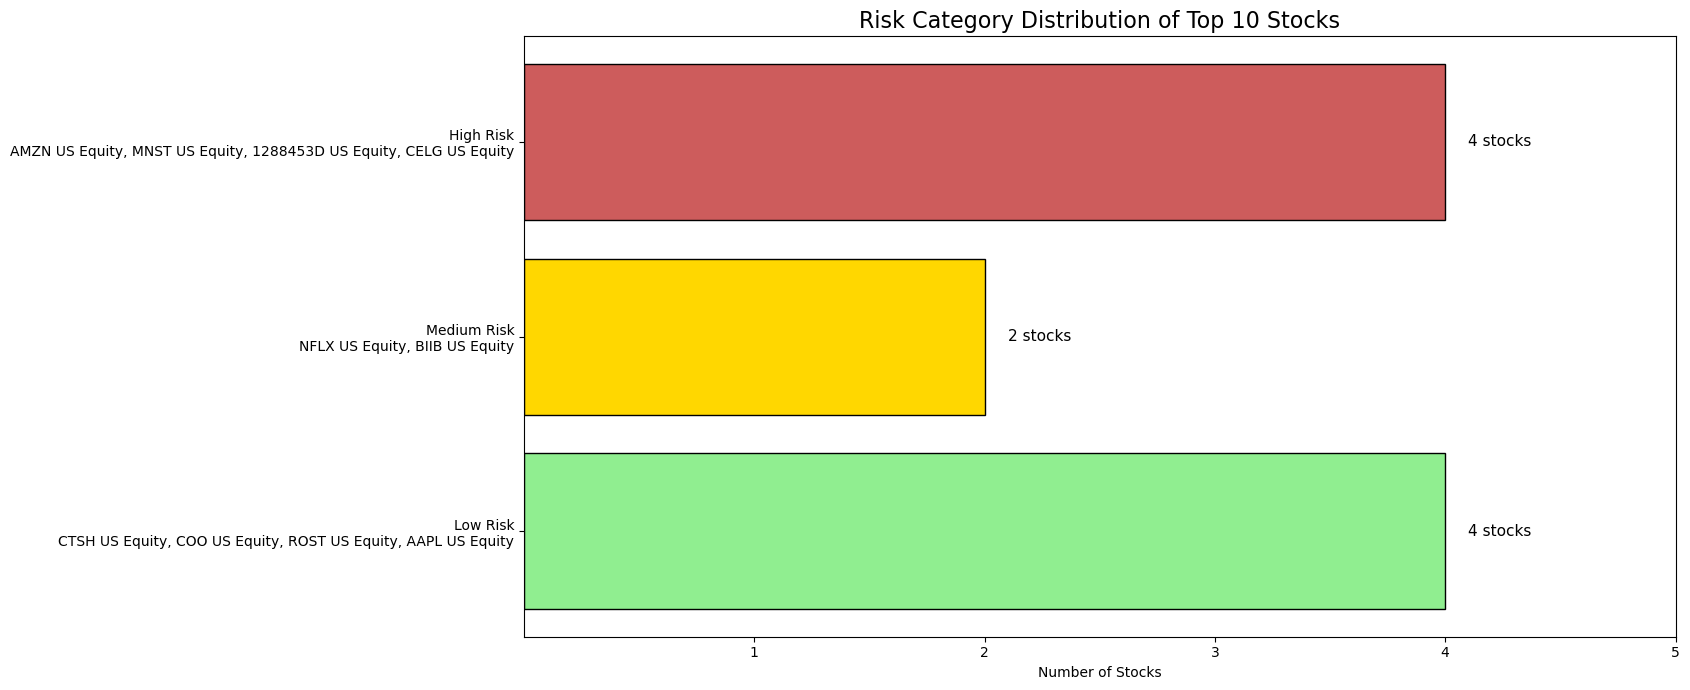

In [59]:
import matplotlib.pyplot as plt

# stocks by risk category
grouped_stocks = volatility_summary.groupby('Risk Category').apply(lambda x: ', '.join(x.index)).to_dict()

# number of stocks in each risk category
risk_counts = volatility_summary['Risk Category'].value_counts().sort_index()

# labels with risk name and stock tickers
labels = [f"{risk}\n{grouped_stocks[risk]}" for risk in risk_counts.index]

# Colors for each category
colors = ['lightgreen', 'gold', 'indianred']

# horizontal barplot 
plt.figure(figsize=(17, 7))
bars = plt.barh(range(len(risk_counts)), risk_counts.values, color=colors, edgecolor='black')

# value labels to bars
for i, count in enumerate(risk_counts.values):
    plt.text(count + 0.1, i, f"{count} stocks", va='center', fontsize=11)

# Set y-axis
plt.yticks(range(len(risk_counts)), labels, fontsize=10)

# Set x-axis
max_count = max(risk_counts.values)
plt.xticks(range(1, max_count + 2))

# Plot
plt.title('Risk Category Distribution of Top 10 Stocks', fontsize=16)
plt.xlabel('Number of Stocks')
plt.tight_layout()
plt.show()

# Risk Diversification of all the Stocks 

### Low Risk Portfolio

In [62]:
from scipy.optimize import minimize

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def get_min_variance_weights(cov_matrix):
    num_assets = cov_matrix.shape[0]
    initial_guess = num_assets * [1. / num_assets]
    bounds = [(0, 1) for _ in range(num_assets)]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    
    result = minimize(portfolio_variance, initial_guess,
                      args=(cov_matrix,), method='SLSQP',
                      bounds=bounds, constraints=constraints)
    return result.x

# Compute covariance matrix
cov_matrix = returns_top10.cov()

# Get weights for minimum variance (low-risk) portfolio
min_var_weights = get_min_variance_weights(cov_matrix)

# Display low-risk weights as percentages
low_risk_portfolio = pd.Series(min_var_weights * 100, index=price_top10.columns)
print("Low-Risk Portfolio Weights (%):\n", low_risk_portfolio.round(2))


Low-Risk Portfolio Weights (%):
 AMZN US Equity         0.76
MNST US Equity         0.00
1288453D US Equity     0.00
NFLX US Equity        13.61
CTSH US Equity         0.00
COO US Equity         12.88
BIIB US Equity         0.00
CELG US Equity         4.08
ROST US Equity        42.11
AAPL US Equity        26.56
dtype: float64


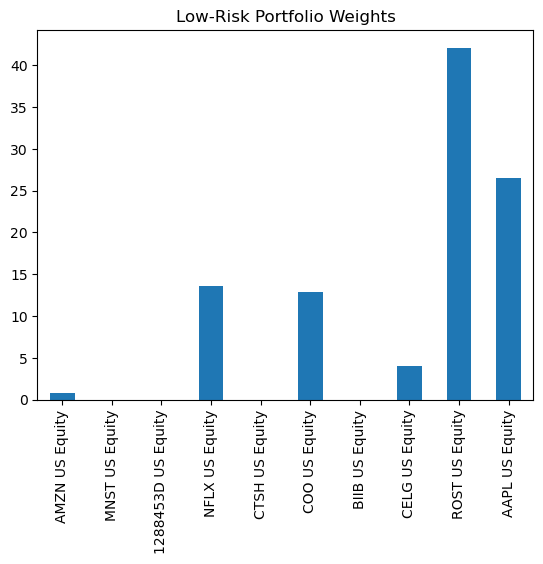

In [63]:
low_risk_portfolio.plot(kind='bar', title='Low-Risk Portfolio Weights')
plt.show()

### High Risk Portfolio

In [65]:
from scipy.optimize import minimize

def negative_sharpe_biased(weights, mean_returns, cov_matrix, volatilities, risk_free_rate=0):
    # Boost return input for high-volatility stocks
    adjusted_returns = mean_returns * (volatilities / volatilities.mean())
    
    portfolio_return = np.dot(weights, adjusted_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(portfolio_return - risk_free_rate) / portfolio_volatility

def get_max_sharpe_weights(mean_returns, cov_matrix, volatilities, risk_free_rate=0):
    num_assets = len(mean_returns)
    initial_guess = num_assets * [1. / num_assets]
    bounds = [(0, 1) for _ in range(num_assets)]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    
    result = minimize(
        negative_sharpe_biased, initial_guess,
        args=(mean_returns, cov_matrix, volatilities, risk_free_rate),
        method='SLSQP', bounds=bounds, constraints=constraints
    )
    return result.x

# Compute mean returns
mean_returns = returns_top10.mean()

# Get weights for max Sharpe (high-risk) portfolio
max_sharpe_weights = get_max_sharpe_weights(mean_returns, cov_matrix, volatility_top10)

# Display high-risk weights as percentages
high_risk_portfolio = pd.Series(max_sharpe_weights * 100, index=price_top10.columns)
print("High-Risk Portfolio Weights (%):\n", high_risk_portfolio.round(2))

High-Risk Portfolio Weights (%):
 AMZN US Equity        10.36
MNST US Equity        11.14
1288453D US Equity     0.00
NFLX US Equity        17.20
CTSH US Equity         0.00
COO US Equity         17.06
BIIB US Equity         0.00
CELG US Equity        12.27
ROST US Equity        31.97
AAPL US Equity         0.00
dtype: float64


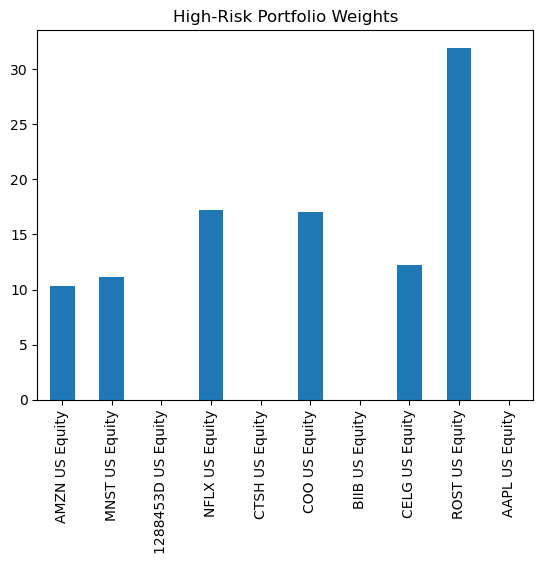

In [66]:
high_risk_portfolio.plot(kind='bar', title='High-Risk Portfolio Weights')
plt.show()